# Análise de Rotatividade de Funcionários - IBM

Este notebook tem como objetivo analisar e modelar a rotatividade de funcionários da IBM com técnicas de regressão logística binária. O foco principal está em identificar os principais fatores associados à saída de colaboradores da empresa, com o suporte de visualizações e testes estatísticos robustos.

---

## 1. Importação das Bibliotecas

Nesta etapa, importamos as bibliotecas essenciais para a análise de dados, visualização e modelagem estatística. Abaixo está um resumo do propósito de cada uma:

- `pandas`: manipulação de dados em DataFrames.
- `funcoes_regressao_binaria`: módulo personalizado contendo funções auxiliares para regressão binária (criado previamente).
- `matplotlib.pyplot` e `seaborn`: criação de gráficos e visualizações.
- `numpy`: operações matemáticas e manipulação de arrays.
- `statsmodels.api` e `statsmodels.formula.api`: modelagem estatística, especialmente regressão logística.
- `math.exp`: função exponencial, útil para converter log-odds em probabilidades.
- `statstests.process.stepwise`: procedimento stepwise automatizado para seleção de variáveis explicativas.

In [135]:
import pandas as pd
import funcoes_regressao_binaria as frb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm #biblioteca de modelagem estatística
from math import exp #operação matemática exponencial
from statstests.process import stepwise #procedimento Stepwise
import statsmodels.formula.api as smf #estimação do modelo logístico binário

Com essas ferramentas, estaremos preparados para conduzir uma análise exploratória aprofundada e construir modelos preditivos estatisticamente sólidos.

## 2. Carregamento dos Dados

Nesta etapa, carregamos os conjuntos de dados que serão utilizados na análise:

- `hr.csv`: contém informações sobre os funcionários da IBM, incluindo variáveis demográficas, profissionais e a variável alvo `Attrition`, que indica se o funcionário deixou a empresa (`Yes`) ou permaneceu (`No`).
- `years.csv`: contém informações complementares relacionadas ao tempo de serviço.

Os dados foram carregados utilizando a função `read_csv()` da biblioteca `pandas`, resultando em dois DataFrames:

In [ ]:
dados_hr = pd.read_csv('hr.csv')
dados_years = pd.read_csv('years.csv')

## 3. Estrutura do Conjunto de Dados

Após o carregamento, verificamos a dimensão do conjunto de dados principal (`dados_hr`), bem como suas informações e se há variáveis nulas e registros duplicados:

In [137]:
dados_hr.shape

(1470, 22)

In [138]:
dados_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   employee_number            1470 non-null   int64 
 1   age                        1470 non-null   int64 
 2   attrition                  1470 non-null   object
 3   business_travel            1470 non-null   object
 4   department                 1470 non-null   object
 5   distance_from_home         1470 non-null   int64 
 6   education                  1470 non-null   object
 7   education_field            1470 non-null   object
 8   environment_satisfaction   1470 non-null   object
 9   gender                     1470 non-null   object
 10  job_involvement            1470 non-null   object
 11  job_role                   1470 non-null   object
 12  job_satisfaction           1470 non-null   object
 13  marital_status             1470 non-null   object
 14  monthly_

In [139]:
dados_hr['employee_number'].duplicated().sum()

0

In [140]:
dados_hr.isna().sum()

employee_number              0
age                          0
attrition                    0
business_travel              0
department                   0
distance_from_home           0
education                    0
education_field              0
environment_satisfaction     0
gender                       0
job_involvement              0
job_role                     0
job_satisfaction             0
marital_status               0
monthly_income               0
num_companies_worked         0
over_time                    0
percent_salary_hike          0
performance_rating           0
relationship_satisfaction    0
training_times_last_year     0
work_life_balance            0
dtype: int64

In [141]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dados_hr.head()

,employee_number,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,job_involvement,job_role,job_satisfaction,marital_status,monthly_income,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,training_times_last_year,work_life_balance
0,1,41,Yes,Travel_Rarely,Sales,1,Some college,Life Sciences,Medium,Female,High,Sales Executive,Very high,Single,5993,8,Yes,11,Excellent,Low,0,Bad
1,2,49,No,Travel_Frequently,Research & Development,8,No college,Life Sciences,High,Male,Medium,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,Very high,3,Better
2,4,37,Yes,Travel_Rarely,Research & Development,2,Some college,Other,Very high,Male,Medium,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,Medium,3,Better
3,5,33,No,Travel_Frequently,Research & Development,3,Masters,Life Sciences,Very high,Female,High,Research Scientist,High,Married,2909,1,Yes,11,Excellent,High,3,Better
4,7,27,No,Travel_Rarely,Research & Development,2,No college,Medical,Low,Male,High,Laboratory Technician,Medium,Married,3468,9,No,12,Excellent,Very high,3,Better


## 4. Análise Exploratória: Boxplots

Utilizamos a função personalizada `frb.boxplots` para gerar boxplots de todas as variáveis numéricas do conjunto de dados `dados_hr`, com exceção da coluna `employee_number`, que representa um identificador único de cada funcionário e, portanto, **não possui valor analítico direto para a modelagem**.

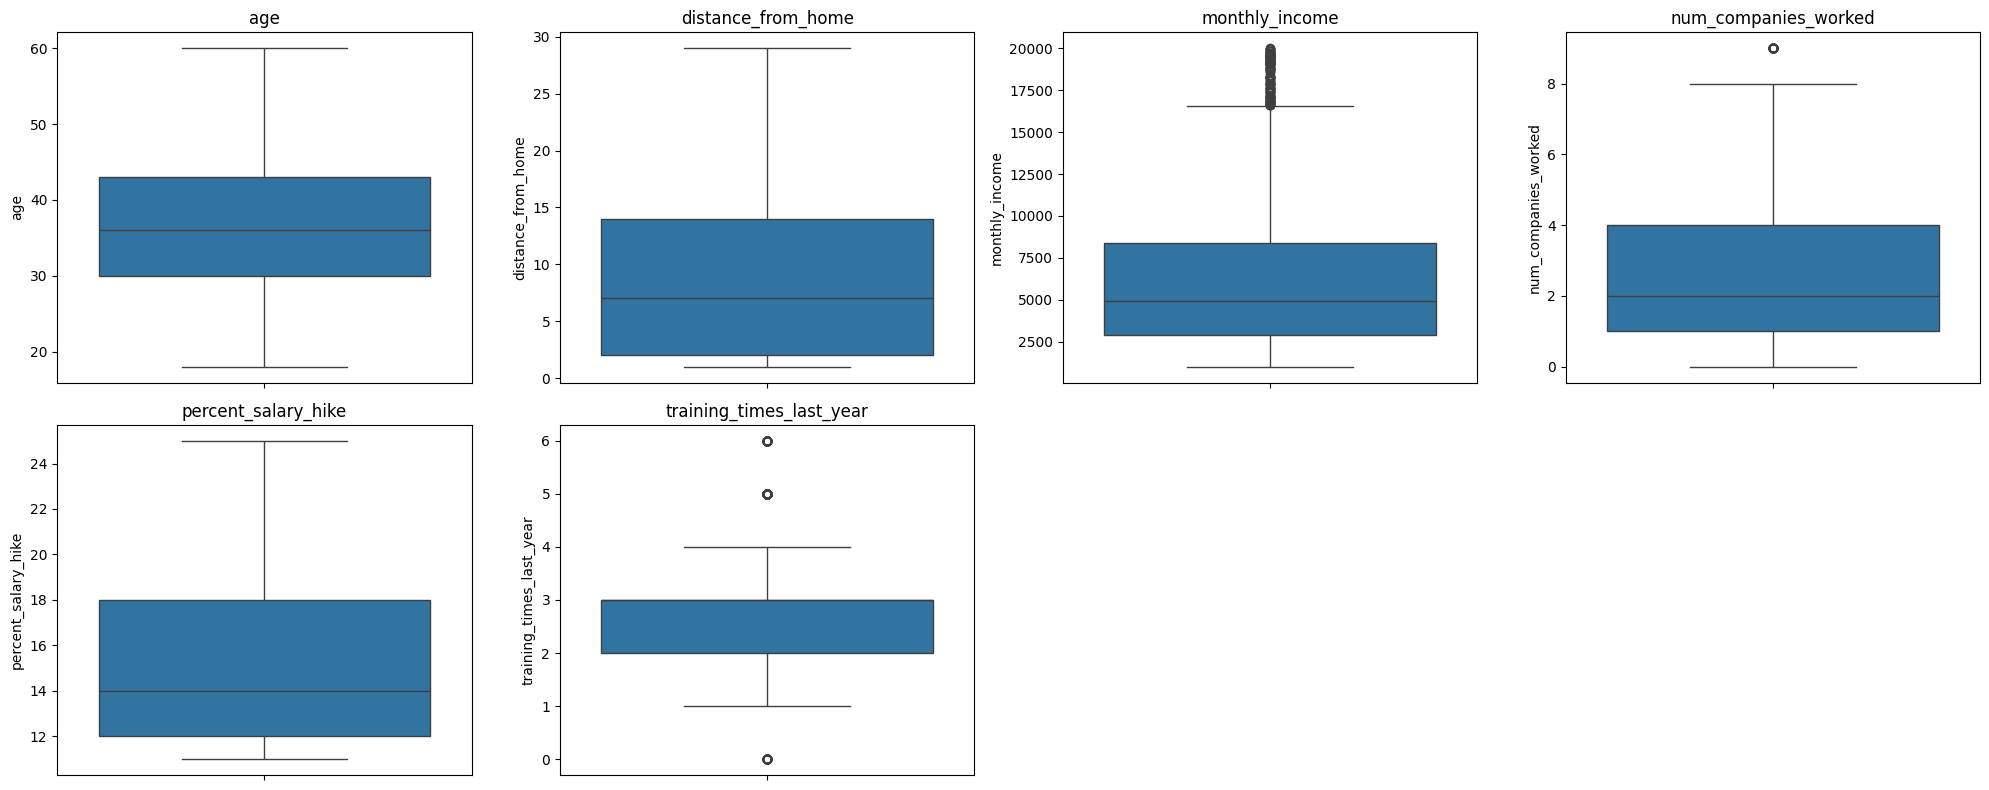

In [142]:
frb.boxplots(dados_hr, 'employee_number')

Os boxplots são úteis para:

* Identificar **distribuições**, **assimetria** e **presença de outliers**.
* Avaliar a **variabilidade** de cada variável numérica.
* Apoiar decisões sobre possíveis **tratamentos de dados extremos**.

> 🔎 **Nota:** A exclusão de identificadores como `employee_number` é uma boa prática, pois esses campos não carregam significado estatístico relevante e podem distorcer visualizações ou modelos.

## 5. Detecção de Outliers - Método IQR

Nesta etapa, aplicamos a função `frb.detectar_outliers_iqr` para identificar **valores extremos (outliers)** nas variáveis numéricas do conjunto de dados, com base no método do intervalo interquartil (IQR - *Interquartile Range*).

In [143]:
frb.detectar_outliers_iqr(df=dados_hr, excluir_classe='employee_number')

,Q1,Q3,AIQ,Min,Max,Limite Inferior,Limite Superior,Qtd Outliers
age,30.0,43.0,13.0,18.0,60.0,10.5,62.5,0.0
distance_from_home,2.0,14.0,12.0,1.0,29.0,-16.0,32.0,0.0
monthly_income,2911.0,8379.0,5468.0,1009.0,19999.0,-5291.0,16581.0,114.0
num_companies_worked,1.0,4.0,3.0,0.0,9.0,-3.5,8.5,52.0
percent_salary_hike,12.0,18.0,6.0,11.0,25.0,3.0,27.0,0.0
training_times_last_year,2.0,3.0,1.0,0.0,6.0,0.5,4.5,238.0


 A função retorna uma tabela no formato `crosstab`, que apresenta um resumo estatístico para cada variável numérica analisada (excetuando a variável `employee_number`, que é um identificador). Abaixo está a explicação detalhada de cada coluna da tabela:

### Colunas do Resultado

* **Q1 (1º Quartil)**
  Representa o valor abaixo do qual estão 25% dos dados. Indica o limite inferior da distribuição típica.

* **Q3 (3º Quartil)**
  Representa o valor abaixo do qual estão 75% dos dados. Indica o limite superior da distribuição típica.

* **IQR (Intervalo Interquartílico)**
  Calculado como `Q3 - Q1`. Mede a **dispersão central** dos dados e é usado para identificar a faixa em que a maior parte dos dados está concentrada.
  Fórmula:

  $$
  IQR = Q3 - Q1
  $$

* **Min (Valor Mínimo Observado)**
  O menor valor encontrado na variável.

* **Max (Valor Máximo Observado)**
  O maior valor encontrado na variável.

* **Limite Inferior (Lower Bound)**
  Limite inferior para identificação de outliers. Valores abaixo deste limite são considerados valores atípicos.
  Fórmula:

  $$
  \text{Limite Inferior} = Q1 - 1.5 \times IQR
  $$

* **Limite Superior (Upper Bound)**
  Limite superior para identificação de outliers. Valores acima deste limite são considerados outliers.
  Fórmula:

  $$
  \text{Limite Superior} = Q3 + 1.5 \times IQR
  $$

* **Qtd Outliers (Quantidade de Outliers)**
  Contagem de observações que estão **fora dos limites inferior e superior**, ou seja, valores que podem ser considerados extremos e potencialmente distorcem a análise.

> ⚠️ A detecção de outliers é uma etapa crucial para garantir a **robustez dos modelos estatísticos**. Embora nem todo outlier precise ser removido, é fundamental identificá-los para avaliar sua origem e impacto.

## 6. Tratamento de Outliers com Mediana

Após identificar a presença de outliers, aplicamos a função `frb.substituir_outliers_mediana` com o objetivo de suavizar os efeitos desses valores extremos nas variáveis numéricas. A estratégia adotada foi substituir os outliers pelos **valores medianos** de cada variável.

In [145]:
dados_hr = frb.substituir_outliers_mediana(df=dados_hr, excluir_classe='employee_number')

Essa técnica é comumente utilizada por ser **robusta a valores extremos**, preservando a distribuição central dos dados sem introduzir distorções severas.

### Visualização pós-tratamento

Após a substituição, os boxplots foram gerados novamente para reavaliar a presença de valores atípicos:

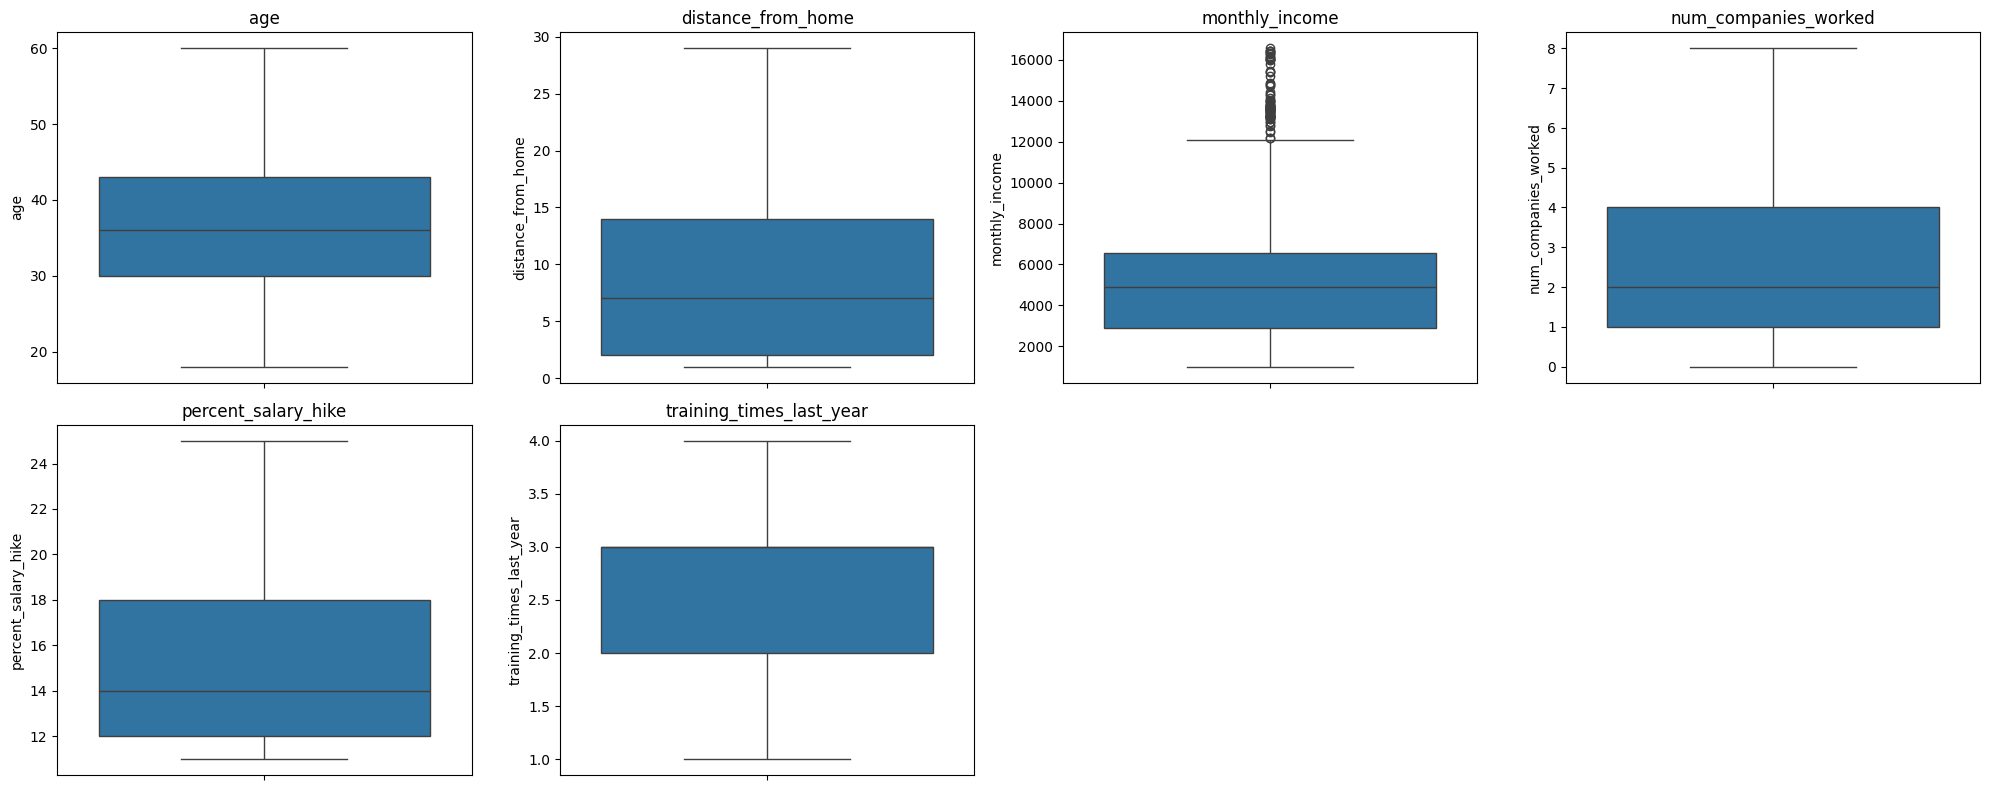

In [204]:
frb.boxplots(dados=dados_hr, excluir_classe='employee_number')

Além disso, utilizamos novamente a função `frb.detectar_outliers_iqr` para quantificar os outliers remanescentes:

In [147]:
frb.detectar_outliers_iqr(df=dados_hr, excluir_classe='employee_number')

,Q1,Q3,AIQ,Min,Max,Limite Inferior,Limite Superior,Qtd Outliers
age,30.0,43.0,13.0,18.0,60.0,10.5,62.5,0.0
distance_from_home,2.0,14.0,12.0,1.0,29.0,-16.0,32.0,0.0
monthly_income,2911.0,6581.0,3670.0,1009.0,16555.0,-2594.0,12086.0,79.0
num_companies_worked,1.0,4.0,3.0,0.0,8.0,-3.5,8.5,0.0
percent_salary_hike,12.0,18.0,6.0,11.0,25.0,3.0,27.0,0.0
training_times_last_year,2.0,3.0,1.0,1.0,4.0,0.5,4.5,0.0


In [148]:
dados_hr.head()

,employee_number,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,job_involvement,job_role,job_satisfaction,marital_status,monthly_income,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,training_times_last_year,work_life_balance
0,1,41,Yes,Travel_Rarely,Sales,1,Some college,Life Sciences,Medium,Female,High,Sales Executive,Very high,Single,5993,8,Yes,11,Excellent,Low,3,Bad
1,2,49,No,Travel_Frequently,Research & Development,8,No college,Life Sciences,High,Male,Medium,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,Very high,3,Better
2,4,37,Yes,Travel_Rarely,Research & Development,2,Some college,Other,Very high,Male,Medium,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,Medium,3,Better
3,5,33,No,Travel_Frequently,Research & Development,3,Masters,Life Sciences,Very high,Female,High,Research Scientist,High,Married,2909,1,Yes,11,Excellent,High,3,Better
4,7,27,No,Travel_Rarely,Research & Development,2,No college,Medical,Low,Male,High,Laboratory Technician,Medium,Married,3468,2,No,12,Excellent,Very high,3,Better


### Observação sobre `MonthlyIncome`

A variável `MonthlyIncome` apresentava **114 outliers** inicialmente. Após o tratamento com a mediana, o número de outliers caiu para **79**. Apesar da redução, ainda existem valores considerados extremos segundo o critério do IQR.

No entanto, optamos por **manter os valores remanescentes**, pois:

* Renda mensal tende a ser naturalmente assimétrica e com cauda longa (muitos ganham pouco, poucos ganham muito).
* Esses valores podem representar **diferenças legítimas de posição ou experiência** e sua remoção poderia comprometer a representatividade dos dados.

> ✅ **Decisão Analítica:** A variável `MonthlyIncome` será mantida com os 79 outliers remanescentes, pois os valores são considerados plausíveis dentro do contexto organizacional.

Perfeito! Aqui está o markdown explicativo para a etapa de **visualização das distribuições das variáveis numéricas** usando histogramas:

---

````markdown
## 7. Visualização das Distribuições - Histogramas

Nesta etapa, geramos histogramas para analisar a **distribuição das variáveis numéricas** do conjunto de dados. Essa análise é importante para entender o comportamento dos dados, identificar possíveis assimetrias, concentrações e dispersões.

Como a coluna `employee_number` é um identificador e não carrega significado analítico, ela foi removida da visualização:

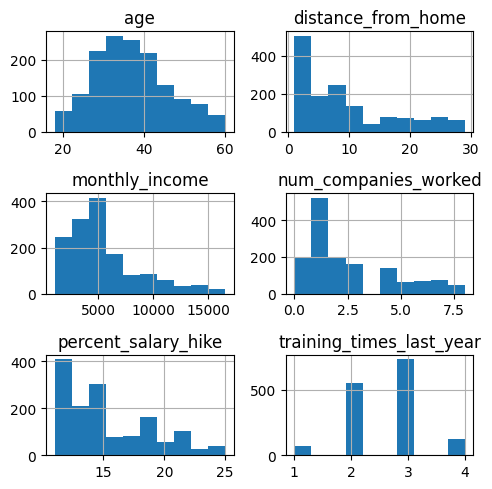

In [149]:
dados_hr.drop(columns='employee_number').hist(figsize=(5,5))
plt.tight_layout()

### Objetivos dessa visualização:

* Verificar **normalidade** ou assimetria das distribuições.
* Observar presença de **valores concentrados** em determinadas faixas.
* Suportar decisões sobre possíveis **transformações** de variáveis (como logaritmo, padronização, etc.).
* Entender o comportamento das variáveis antes da modelagem estatística.

Perfeito! A estrutura do `dados_year` indica que ele está em formato **longo (long format)**, onde cada linha representa uma métrica temporal (`category`) associada a um funcionário identificado por `employee_number`. Abaixo está o markdown explicativo para esta etapa:

---

````markdown
## 8. Estrutura do Conjunto de Dados Temporais (`dados_year`)

Utilizamos o método `.head()` para visualizar as primeiras linhas do conjunto `dados_year`, que contém informações complementares relacionadas ao tempo de serviço dos funcionários:

In [150]:
dados_years.head()

,employee_number,category,years
0,1,total_working_years,8
1,1,years_at_company,6
2,1,years_in_current_role,4
3,1,years_since_last_promotion,0
4,1,years_with_curr_manager,5


### Interpretação:

* `employee_number`: identificador único de cada funcionário, usado para **relacionar com o conjunto principal** (`dados_hr`).
* `category`: variável categórica que descreve o tipo de métrica temporal associada ao funcionário.
* `years`: valor numérico que representa o tempo (em anos) correspondente à categoria.

> 📌 O formato do dataset está estruturado no estilo **"long format"**, onde cada linha representa uma **observação de tempo por categoria** para cada funcionário. Esse formato pode ser útil para análises específicas ou visualizações, mas normalmente será necessário **pivotar** esse conjunto para o formato **wide (largura)** antes de combiná-lo com o dataset principal.

## 9. Transformação do Conjunto `dados_years` para Formato Wide

Para facilitar a integração com o conjunto principal (`dados_hr`), transformamos o dataset `dados_years` que estava no formato longo em um formato largo (*wide format*), onde cada métrica temporal vira uma coluna distinta.

Utilizamos o método `pivot` do pandas:

In [ ]:
dados_years = dados_years.pivot(index="employee_number", columns="category", values="years").reset_index()

In [152]:
dados_years.head()

category,employee_number,total_working_years,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,1,8,6,4,0,5
1,2,10,10,7,1,7
2,4,7,0,0,0,0
3,5,8,8,7,3,0
4,7,6,2,2,2,2


### Detalhes:

* `index="employee_number"`: cada linha representa um funcionário único.
* `columns="category"`: as categorias de tempo viram colunas separadas.
* `values="years"`: os valores correspondentes são preenchidos nas células.

Após essa transformação, o dataframe `dados_years` terá uma estrutura com colunas como:

* `total_working_years`
* `years_at_company`
* `years_in_current_role`
* `years_since_last_promotion`
* `years_with_curr_manager`

Isso facilita a junção dos dados com o dataset principal para análises conjuntas.

## 10. Verificação da Estrutura e Qualidade do Dataset `dados_years`

Após a transformação para formato wide, verificamos as dimensões, os tipos de dados e a existência de valores ausentes no dataframe `dados_years`:

In [153]:
print(dados_years.shape)
print(dados_years.info())
print(dados_years.isna().sum())

(1470, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   employee_number             1470 non-null   int64
 1   total_working_years         1470 non-null   int64
 2   years_at_company            1470 non-null   int64
 3   years_in_current_role       1470 non-null   int64
 4   years_since_last_promotion  1470 non-null   int64
 5   years_with_curr_manager     1470 non-null   int64
dtypes: int64(6)
memory usage: 69.0 KB
None
category
employee_number               0
total_working_years           0
years_at_company              0
years_in_current_role         0
years_since_last_promotion    0
years_with_curr_manager       0
dtype: int64


### Objetivos dessa etapa:

* **Shape:** Confirmar o número de linhas (funcionários) e colunas (variáveis temporais + identificador).
* **Info:** Validar os tipos de dados de cada coluna, garantindo que as variáveis numéricas estejam adequadamente representadas.
* **Valores Ausentes:** Identificar colunas que contenham dados faltantes, para posterior tratamento.

> 🛠️ A análise cuidadosa dessa etapa é fundamental para assegurar a integridade dos dados antes de realizar a fusão com o dataset principal e evitar erros durante a modelagem.

## 11. Análise e Tratamento de Outliers no Dataset `dados_years`

Para garantir a qualidade dos dados temporais após a transformação, repetimos o mesmo processo de análise e tratamento de outliers aplicado no dataset principal:

### 1. Visualização Inicial dos Boxplots

Geramos boxplots para todas as variáveis numéricas, excluindo a coluna `employee_number`, para identificar possíveis outliers:

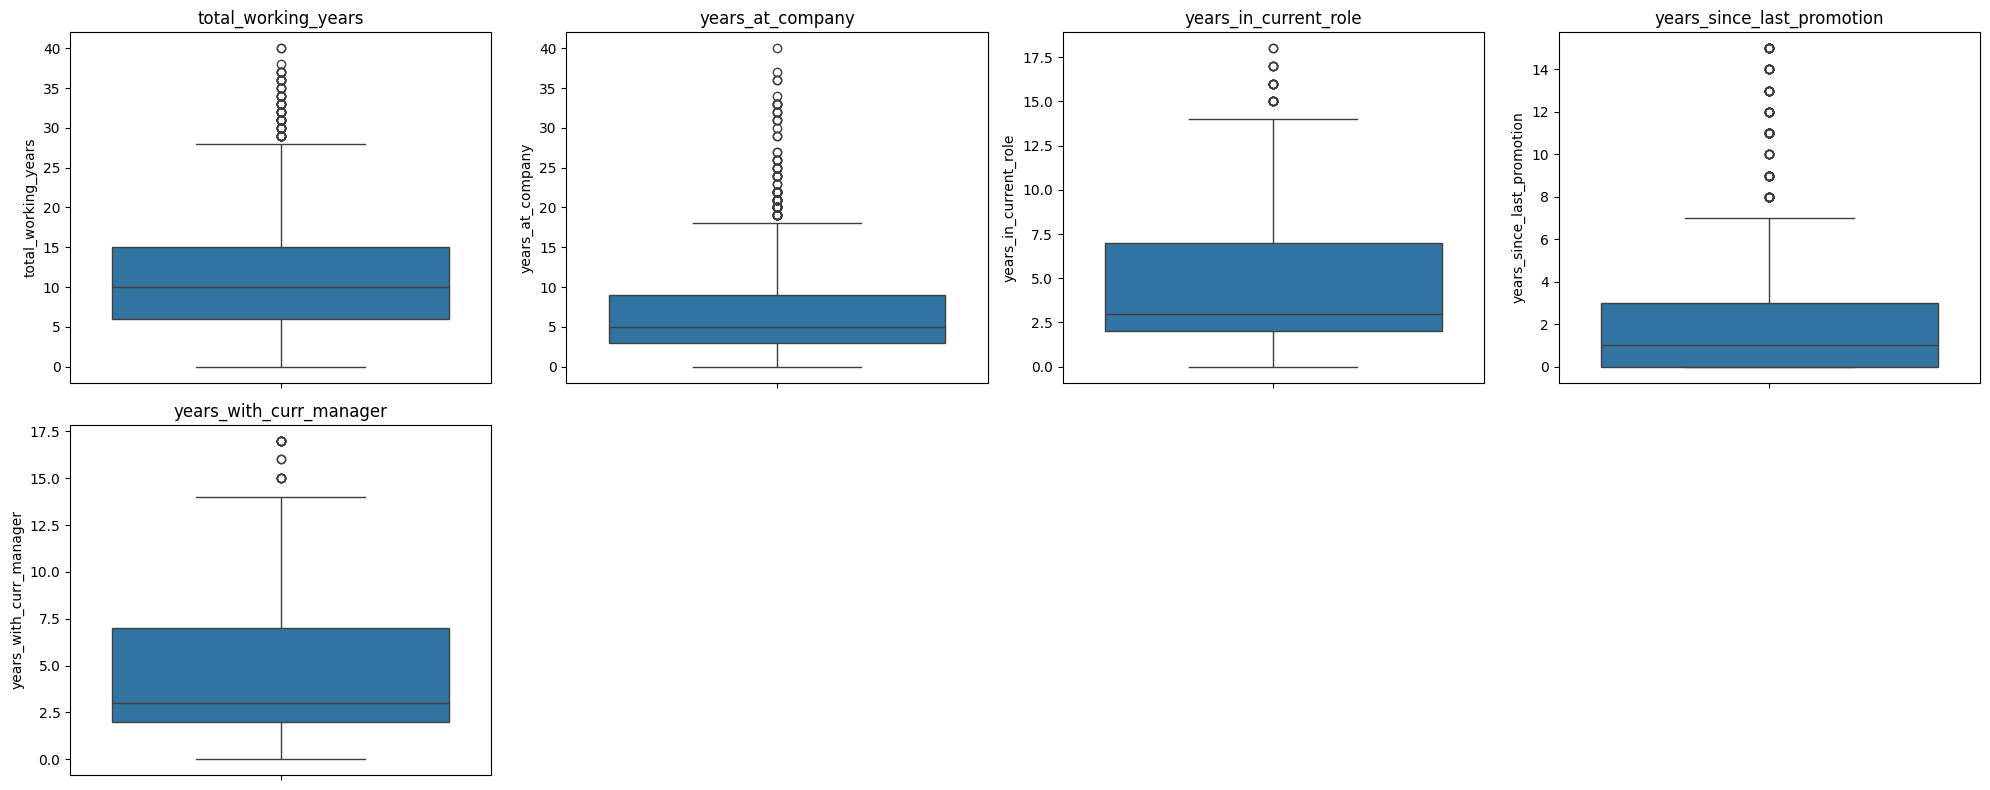

In [154]:
frb.boxplots(dados=dados_years, excluir_classe='employee_number')

### 2. Detecção Quantitativa de Outliers pelo Método IQR

Utilizamos a função para detectar quantitativamente a presença de outliers em cada variável:

In [155]:
frb.detectar_outliers_iqr(df=dados_years, excluir_classe='employee_number')

,Q1,Q3,AIQ,Min,Max,Limite Inferior,Limite Superior,Qtd Outliers
total_working_years,6.0,15.0,9.0,0.0,40.0,-7.5,28.5,63.0
years_at_company,3.0,9.0,6.0,0.0,40.0,-6.0,18.0,104.0
years_in_current_role,2.0,7.0,5.0,0.0,18.0,-5.5,14.5,21.0
years_since_last_promotion,0.0,3.0,3.0,0.0,15.0,-4.5,7.5,107.0
years_with_curr_manager,2.0,7.0,5.0,0.0,17.0,-5.5,14.5,14.0


### 3. Substituição dos Outliers pela Mediana

Realizamos a substituição dos outliers detectados pelos valores medianos das respectivas variáveis, suavizando possíveis distorções sem perder a representatividade dos dados:

In [156]:
dados_years = frb.substituir_outliers_mediana(df=dados_years, excluir_classe='employee_number')


### 4. Visualização Pós-Tratamento

Finalmente, geramos novamente os boxplots para verificar se o tratamento foi eficaz na redução dos outliers:

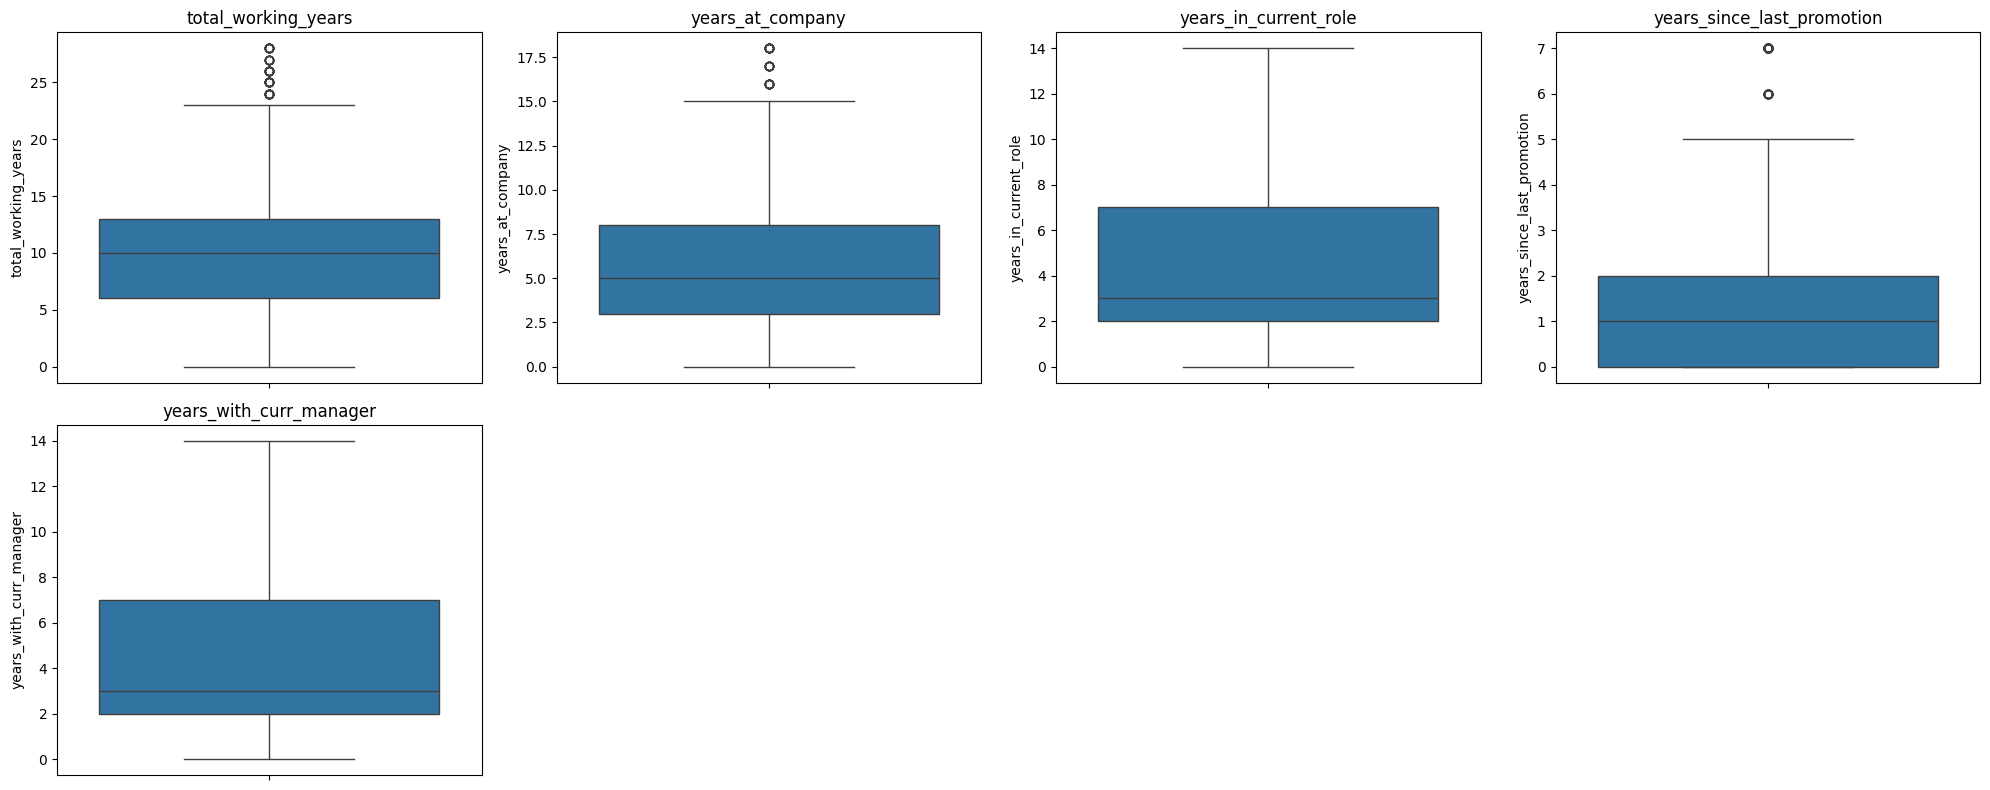

In [157]:
frb.boxplots(dados_years, 'employee_number')

In [158]:
frb.detectar_outliers_iqr(df=dados_years, excluir_classe='employee_number')

,Q1,Q3,AIQ,Min,Max,Limite Inferior,Limite Superior,Qtd Outliers
total_working_years,6.0,13.0,7.0,0.0,28.0,-4.5,23.5,67.0
years_at_company,3.0,8.0,5.0,0.0,18.0,-4.5,15.5,34.0
years_in_current_role,2.0,7.0,5.0,0.0,14.0,-5.5,14.5,0.0
years_since_last_promotion,0.0,2.0,2.0,0.0,7.0,-3.0,5.0,108.0
years_with_curr_manager,2.0,7.0,5.0,0.0,14.0,-5.5,14.5,0.0


> 💡 Esse procedimento sistemático assegura que os dados temporais estejam limpos e preparados para análise integrada com o dataset principal, evitando impactos negativos em modelos estatísticos causados por valores extremos.

## 12. Visualização das Distribuições das Variáveis Temporais

Após o tratamento dos outliers, geramos histogramas para visualizar a distribuição das variáveis temporais no dataset `dados_years`. 

Como de costume, a coluna `employee_number` foi excluída da visualização por ser um identificador:

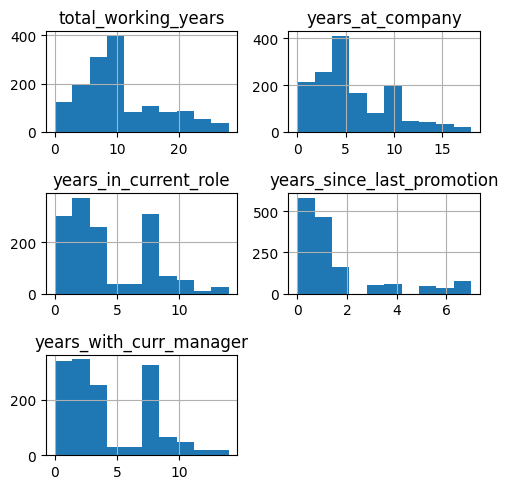

In [159]:
dados_years.drop(columns='employee_number').hist(figsize=(5,5))
plt.tight_layout()
plt.show()

### Objetivos dessa visualização:

- Observar a forma das distribuições das variáveis temporais (como anos de serviço, tempo no cargo atual, tempo desde a última promoção, etc.).
- Identificar possíveis assimetrias ou concentrações.
- Suportar decisões futuras sobre transformações ou normalizações antes da modelagem.

> 📌 A visualização ajuda a garantir que as variáveis estejam adequadamente preparadas para análises estatísticas e para a construção de modelos preditivos.

## 13. Integração dos Conjuntos de Dados

Para consolidar as informações dos funcionários e seus dados temporais em um único dataset, realizamos a junção (*merge*) dos dois dataframes:

- `dados_hr`: dados principais dos funcionários.
- `dados_years`: dados temporais já no formato largo.

Utilizamos a função `pd.merge` do pandas, combinando os dados com base na coluna comum `employee_number`:

In [160]:
dados_rotatividade_ibm = pd.merge(dados_hr, dados_years, on='employee_number', how='inner')

In [161]:
dados_rotatividade_ibm.head()

,employee_number,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,job_involvement,job_role,job_satisfaction,marital_status,monthly_income,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,training_times_last_year,work_life_balance,total_working_years,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,1,41,Yes,Travel_Rarely,Sales,1,Some college,Life Sciences,Medium,Female,High,Sales Executive,Very high,Single,5993,8,Yes,11,Excellent,Low,3,Bad,8,6,4,0,5
1,2,49,No,Travel_Frequently,Research & Development,8,No college,Life Sciences,High,Male,Medium,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,Very high,3,Better,10,10,7,1,7
2,4,37,Yes,Travel_Rarely,Research & Development,2,Some college,Other,Very high,Male,Medium,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,Medium,3,Better,7,0,0,0,0
3,5,33,No,Travel_Frequently,Research & Development,3,Masters,Life Sciences,Very high,Female,High,Research Scientist,High,Married,2909,1,Yes,11,Excellent,High,3,Better,8,8,7,3,0
4,7,27,No,Travel_Rarely,Research & Development,2,No college,Medical,Low,Male,High,Laboratory Technician,Medium,Married,3468,2,No,12,Excellent,Very high,3,Better,6,2,2,2,2


### Detalhes da operação:

- `on='employee_number'`: chave utilizada para combinar as observações correspondentes.
- `how='inner'`: mantém apenas os funcionários que estão presentes em ambos os datasets, garantindo dados completos para análise.

O resultado é um dataframe consolidado, `dados_rotatividade_ibm`, contendo tanto as informações demográficas e profissionais quanto as variáveis temporais para cada funcionário.

## 14. Verificação da Estrutura e Qualidade do Dataset Consolidado

Após a junção dos datasets, realizamos uma inspeção detalhada do novo dataframe `dados_rotatividade_ibm` para garantir a integridade e adequação dos dados para análise:

In [162]:
print(dados_rotatividade_ibm.shape)
print(dados_rotatividade_ibm.info())
print(dados_rotatividade_ibm.isna().sum())

(1470, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   employee_number             1470 non-null   int64 
 1   age                         1470 non-null   int64 
 2   attrition                   1470 non-null   object
 3   business_travel             1470 non-null   object
 4   department                  1470 non-null   object
 5   distance_from_home          1470 non-null   int64 
 6   education                   1470 non-null   object
 7   education_field             1470 non-null   object
 8   environment_satisfaction    1470 non-null   object
 9   gender                      1470 non-null   object
 10  job_involvement             1470 non-null   object
 11  job_role                    1470 non-null   object
 12  job_satisfaction            1470 non-null   object
 13  marital_status              1470 non-

### Objetivos dessa inspeção:

* **Shape:** Confirmar o número de observações e variáveis no dataset consolidado.
* **Info:** Verificar os tipos de dados para cada coluna, garantindo que estejam corretos para análises futuras.
* **Valores Ausentes:** Identificar e quantificar possíveis dados faltantes para tratamento posterior.

> 🛠️ Essa etapa é crucial para assegurar que a união dos datasets não tenha gerado inconsistências, e para preparar o conjunto para as próximas etapas de modelagem.

Beleza! Aqui vai um markdown explicativo para essas ações finais que você fez — exportar o dataset consolidado e remover a coluna de ID para a modelagem:

## 15. Exportação dos Dados Consolidados e Preparação para Modelagem

Após a consolidação e verificação dos dados, realizamos as seguintes operações:

### 1. Exportação para arquivo CSV

Salvamos o dataframe `dados_rotatividade_ibm` em um arquivo CSV para armazenamento e uso futuro:

In [163]:
dados_rotatividade_ibm.to_csv('dados_ibm_rotatividade.csv', index=False)

In [164]:
dados_rotatividade_ibm.head()

,employee_number,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,job_involvement,job_role,job_satisfaction,marital_status,monthly_income,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,training_times_last_year,work_life_balance,total_working_years,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,1,41,Yes,Travel_Rarely,Sales,1,Some college,Life Sciences,Medium,Female,High,Sales Executive,Very high,Single,5993,8,Yes,11,Excellent,Low,3,Bad,8,6,4,0,5
1,2,49,No,Travel_Frequently,Research & Development,8,No college,Life Sciences,High,Male,Medium,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,Very high,3,Better,10,10,7,1,7
2,4,37,Yes,Travel_Rarely,Research & Development,2,Some college,Other,Very high,Male,Medium,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,Medium,3,Better,7,0,0,0,0
3,5,33,No,Travel_Frequently,Research & Development,3,Masters,Life Sciences,Very high,Female,High,Research Scientist,High,Married,2909,1,Yes,11,Excellent,High,3,Better,8,8,7,3,0
4,7,27,No,Travel_Rarely,Research & Development,2,No college,Medical,Low,Male,High,Laboratory Technician,Medium,Married,3468,2,No,12,Excellent,Very high,3,Better,6,2,2,2,2


* `index=False` evita salvar o índice do dataframe no arquivo, deixando o CSV mais limpo e adequado para análises posteriores.

### 2. Remoção da coluna `employee_number`

Como o identificador único dos funcionários (`employee_number`) não possui valor preditivo e pode atrapalhar a modelagem, removemos essa coluna:

In [165]:
dados_rotatividade_ibm.drop(columns='employee_number', inplace=True)

> 🧹 Essa limpeza final garante que os dados estejam prontos para as etapas seguintes, como codificação, análise exploratória detalhada e construção do modelo preditivo.

## 16. Conversão da Variável Alvo `Attrition` para Formato Numérico

Para facilitar a modelagem estatística, convertemos a variável alvo `Attrition` que originalmente contém valores categóricos `'Yes'` e `'No'` para um formato numérico binário:

### 1. Definição da função de conversão

Criamos uma função simples que atribui o valor 1 para `'Yes'` (funcionário que saiu) e 0 para `'No'` (funcionário que permaneceu):

In [166]:
def aplicar_valor(value):
    if value == 'Yes':
        return 1
    else:
        return 0


### 2. Aplicação da função na coluna `Attrition`

Utilizamos o método `.apply()` para aplicar essa função a toda a coluna, criando assim uma nova coluna `attrition` com valores binários:

In [167]:
dados_rotatividade_ibm['attrition'] = dados_rotatividade_ibm['attrition'].apply(aplicar_valor)

### Resultado esperado:

* `attrition = 1` → Funcionário deixou a empresa.
* `attrition = 0` → Funcionário permaneceu na empresa.

> 🎯 Essa transformação é fundamental para alimentar modelos de classificação binária, como a regressão logística, que requerem variáveis dependentes numéricas.

## 17. Análise da Distribuição da Variável Alvo (`attrition`)

Após a conversão da variável `Attrition` para formato numérico binário, realizamos uma análise de distribuição para verificar a proporção de funcionários que saíram da empresa em relação aos que permaneceram.

### Código executado:

attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


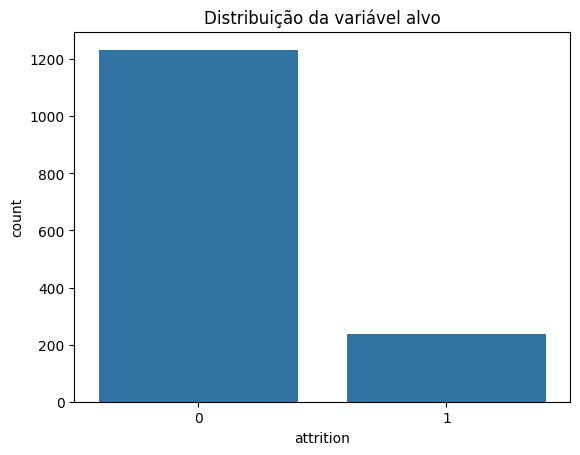

In [168]:
# Distribuição da variável alvo
print(dados_rotatividade_ibm['attrition'].value_counts(normalize=True))
sns.countplot(x='attrition', data=dados_rotatividade_ibm)
plt.title("Distribuição da variável alvo")
plt.show()


### Interpretação:

* O método `value_counts(normalize=True)` mostra a **proporção relativa** dos valores `0` (permaneceu) e `1` (saiu).
* O gráfico de barras (`countplot`) permite visualizar claramente a **diferença no número de registros** entre as duas classes.

### Observação:

A análise revelou um **desbalanceamento entre as classes**:

* A classe `0` (funcionários que permaneceram na empresa) é **significativamente mais frequente** do que a classe `1` (funcionários que saíram).
* Esse desbalanceamento pode afetar negativamente a performance de modelos preditivos, que podem ser tendenciosos a prever a classe majoritária.

> 🧠 **Importante:** Em etapas futuras, será necessário aplicar técnicas de balanceamento de classes (como `SMOTE`, `undersampling`, `class_weight`, etc.) para garantir que o modelo aprenda a identificar corretamente os casos de rotatividade (classe 1).

Excelente! Esse bloco é fundamental para a **análise exploratória das variáveis categóricas** com relação à variável alvo `attrition`. Abaixo está um markdown explicativo bem completo para documentar essa etapa do seu notebook:

## 18. Análise Exploratória das Variáveis Categóricas

Nesta etapa, exploramos o comportamento das variáveis categóricas em relação à variável alvo `attrition`. O objetivo é identificar padrões, associações ou diferenças relevantes entre as categorias e a rotatividade de funcionários.

### 1. Identificação das variáveis categóricas e numéricas

Primeiramente, separamos as colunas categóricas e numéricas do dataset:

In [169]:
cat_vars = dados_rotatividade_ibm.select_dtypes(include='object').columns.tolist()
num_vars = dados_rotatividade_ibm.select_dtypes(include=np.number).columns.tolist()
num_vars.remove('attrition') if 'attrition' in num_vars else None

* `cat_vars`: lista de colunas com tipo `object` (categóricas).
* `num_vars`: lista de colunas numéricas, excluindo a variável alvo `attrition`.

### 2. Visualização e análise de impacto da `attrition` em cada variável categórica

Para cada variável categórica, realizamos:

* **Gráfico de barras segmentado pela variável alvo (`attrition`)**:

  * Permite visualizar a distribuição das saídas (`1`) e permanências (`0`) dentro de cada categoria.
* **Tabela cruzada de proporções normalizada por linha**:

  * Mostra a **distribuição percentual de `attrition`** dentro de cada valor da variável categórica.

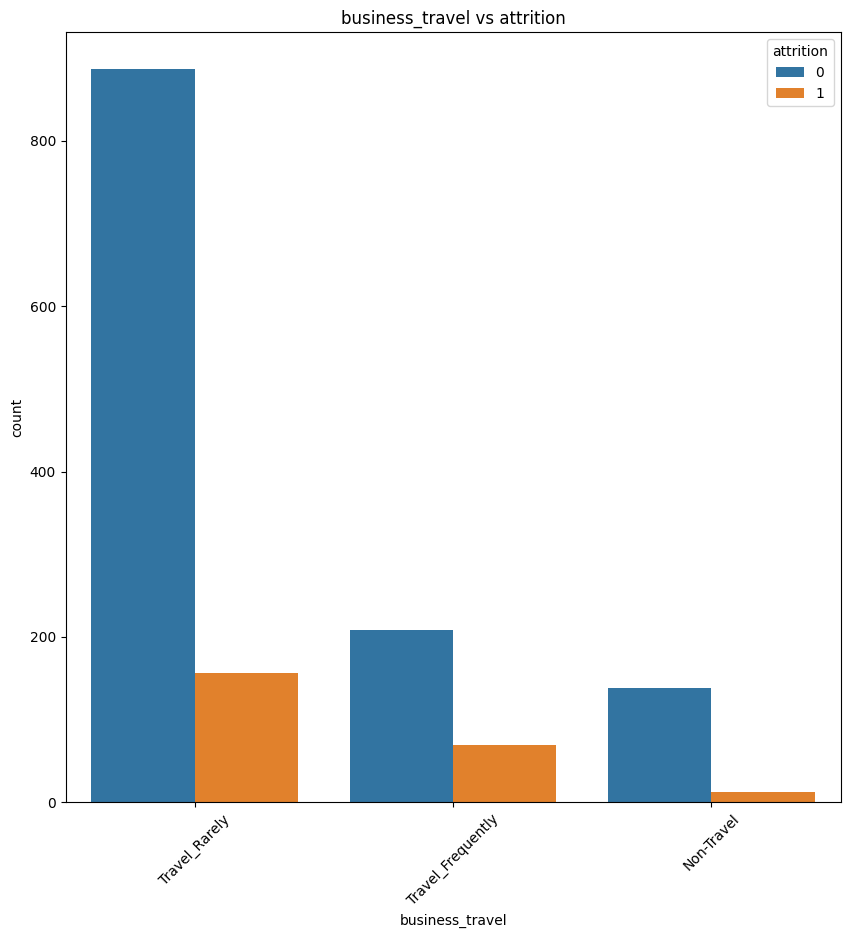


Distribuição percentual de target por business_travel:
 attrition                 0         1
business_travel                      
Non-Travel         0.920000  0.080000
Travel_Frequently  0.750903  0.249097
Travel_Rarely      0.850431  0.149569


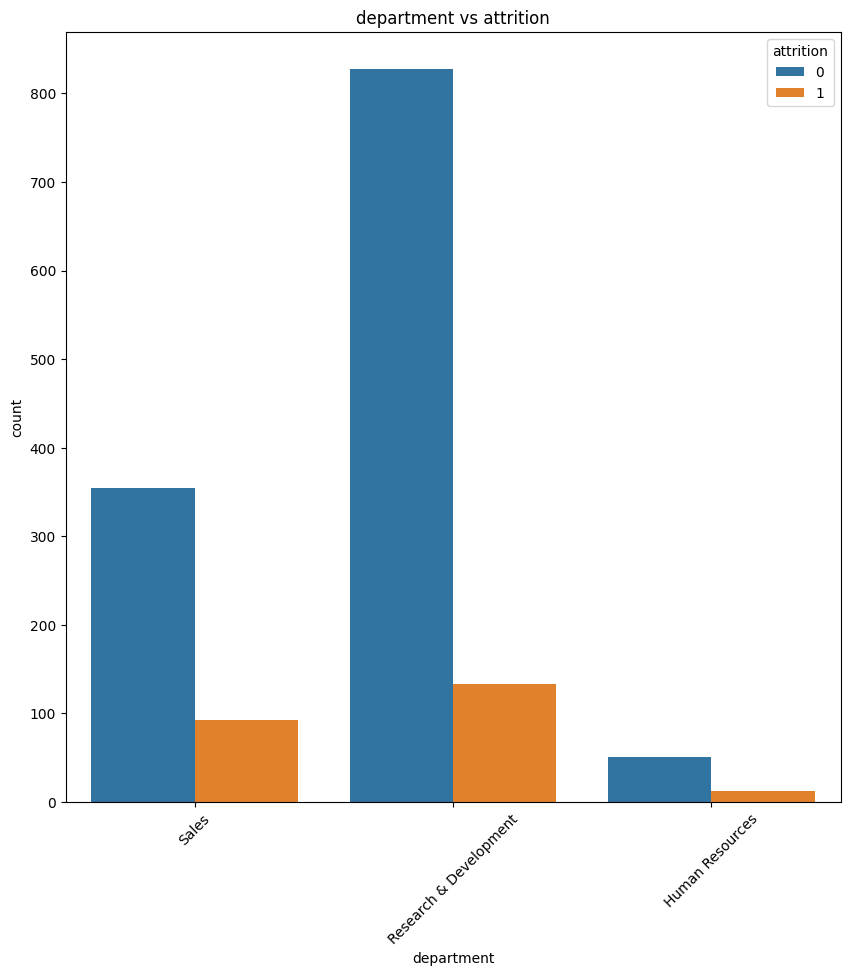


Distribuição percentual de target por department:
 attrition                      0         1
department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278


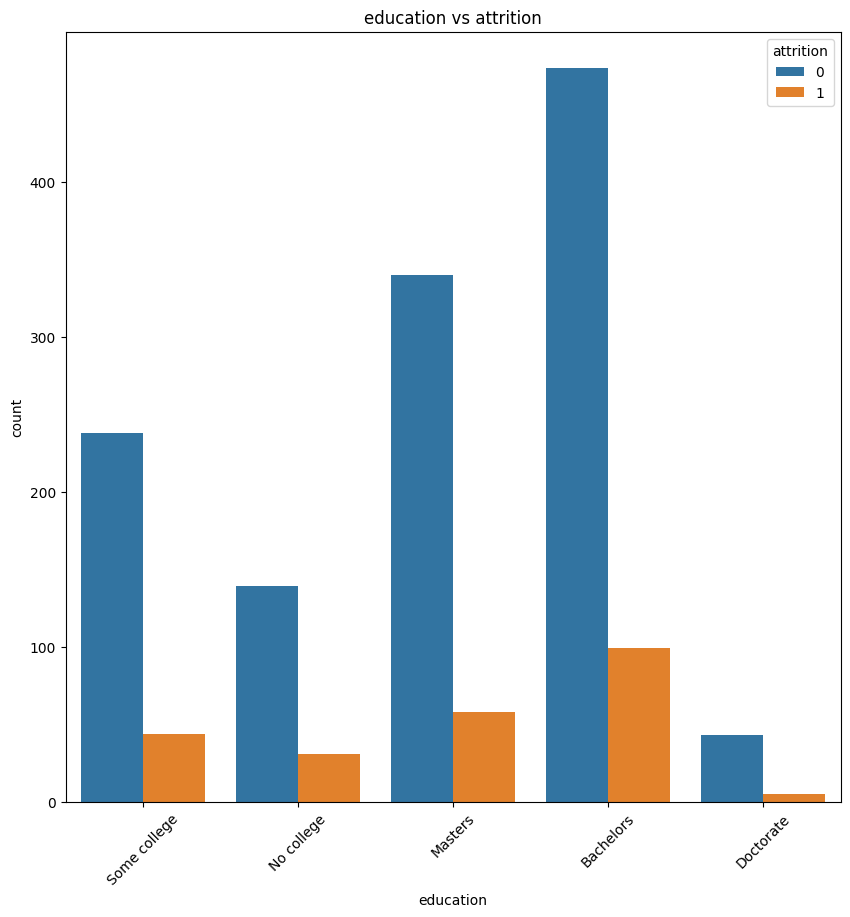


Distribuição percentual de target por education:
 attrition            0         1
education                       
Bachelors     0.826923  0.173077
Doctorate     0.895833  0.104167
Masters       0.854271  0.145729
No college    0.817647  0.182353
Some college  0.843972  0.156028


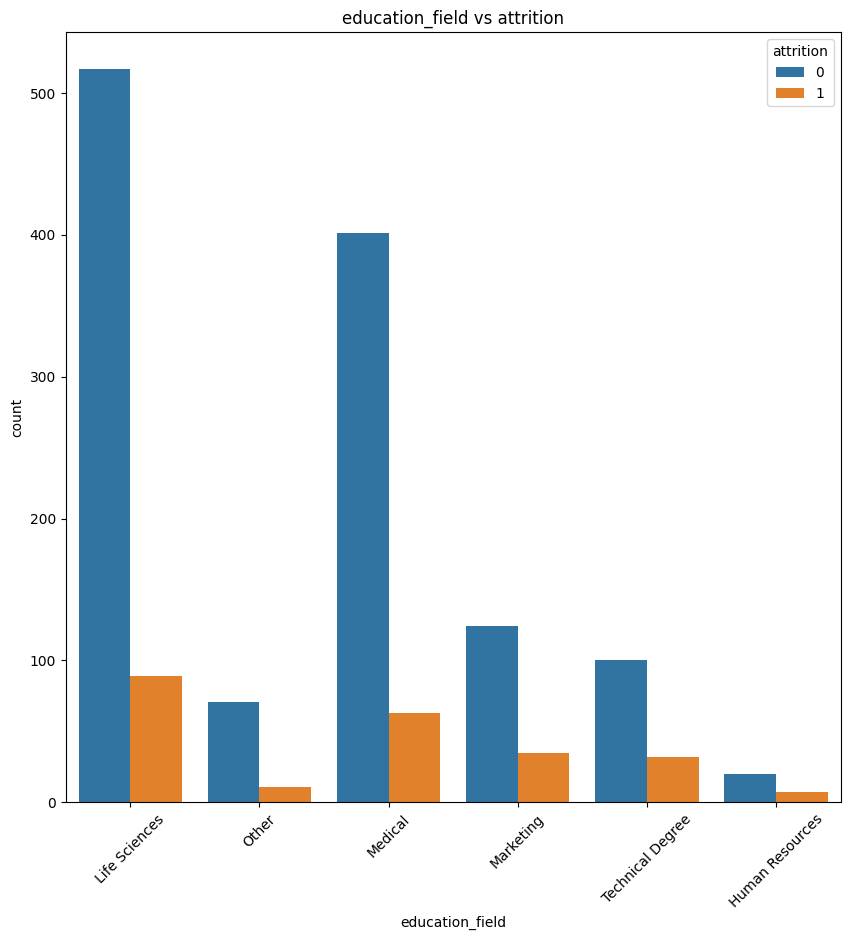


Distribuição percentual de target por education_field:
 attrition                0         1
education_field                     
Human Resources   0.740741  0.259259
Life Sciences     0.853135  0.146865
Marketing         0.779874  0.220126
Medical           0.864224  0.135776
Other             0.865854  0.134146
Technical Degree  0.757576  0.242424


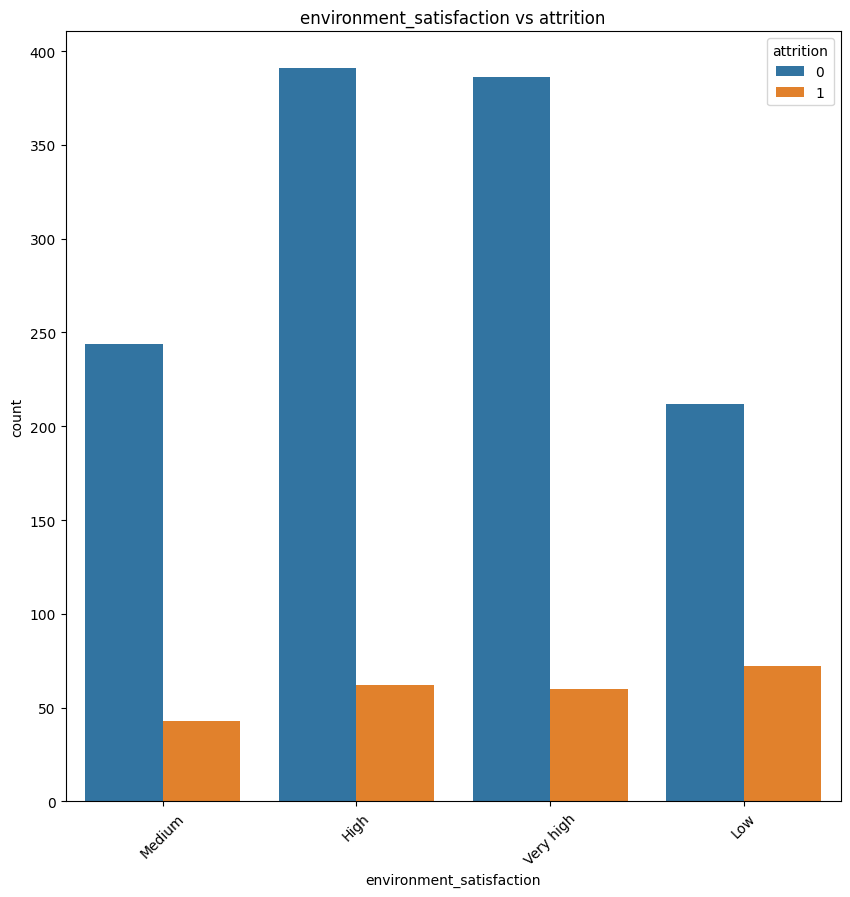


Distribuição percentual de target por environment_satisfaction:
 attrition                        0         1
environment_satisfaction                    
High                      0.863135  0.136865
Low                       0.746479  0.253521
Medium                    0.850174  0.149826
Very high                 0.865471  0.134529


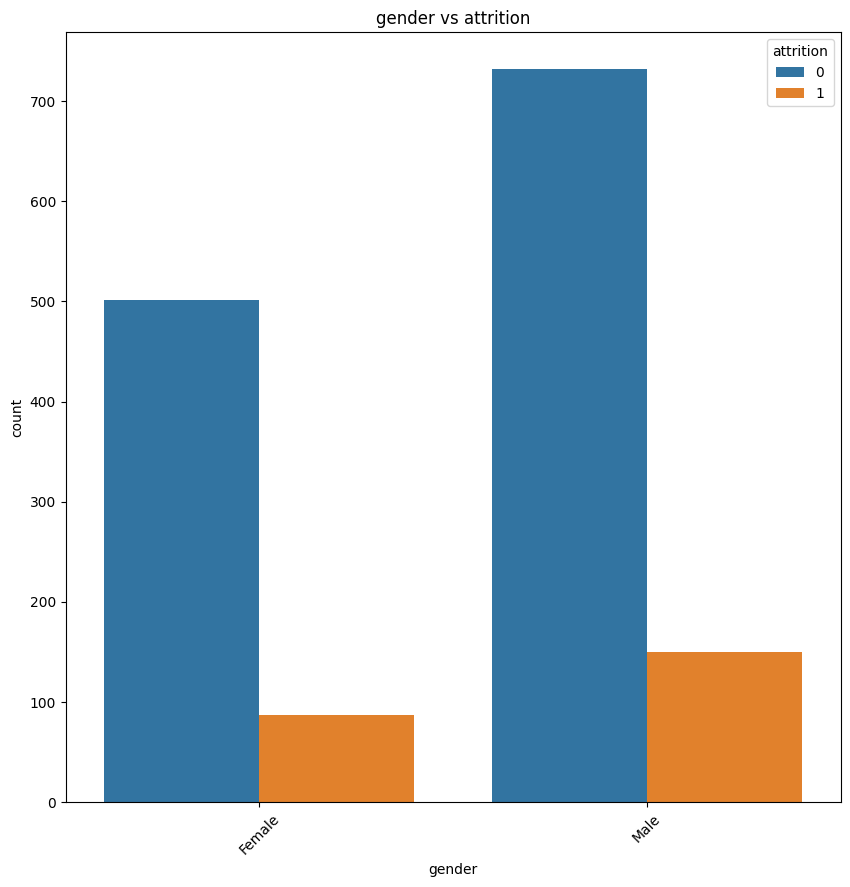


Distribuição percentual de target por gender:
 attrition         0         1
gender                       
Female     0.852041  0.147959
Male       0.829932  0.170068


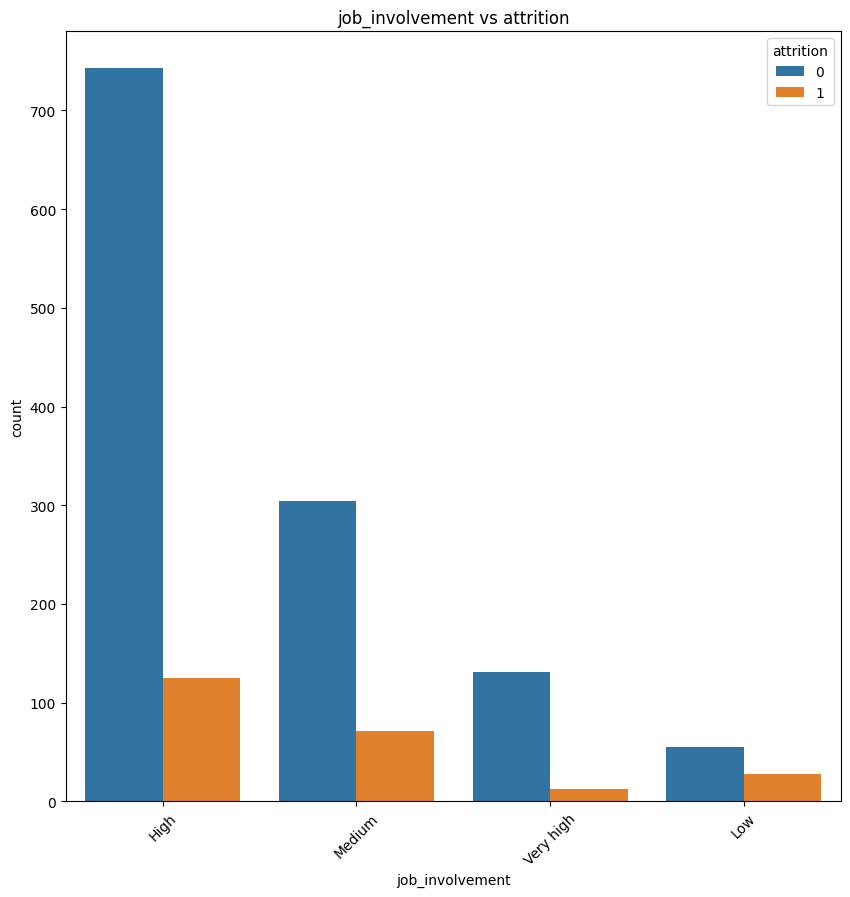


Distribuição percentual de target por job_involvement:
 attrition               0         1
job_involvement                    
High             0.855991  0.144009
Low              0.662651  0.337349
Medium           0.810667  0.189333
Very high        0.909722  0.090278


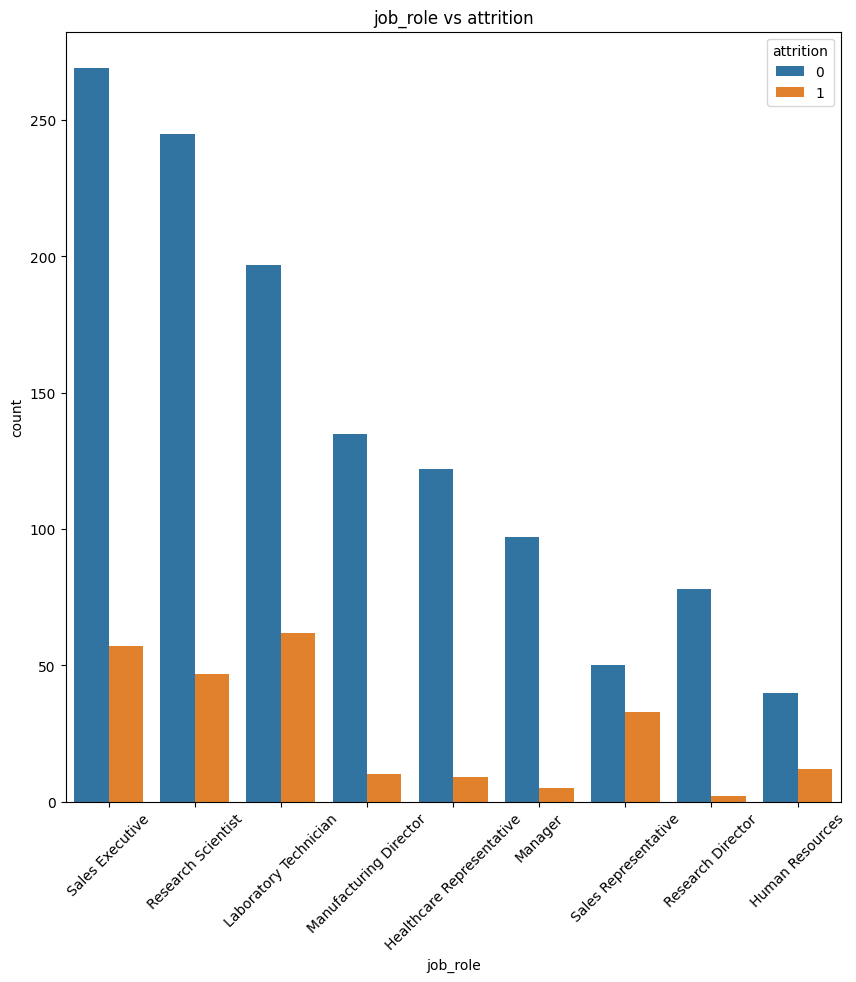


Distribuição percentual de target por job_role:
 attrition                         0         1
job_role                                     
Healthcare Representative  0.931298  0.068702
Human Resources            0.769231  0.230769
Laboratory Technician      0.760618  0.239382
Manager                    0.950980  0.049020
Manufacturing Director     0.931034  0.068966
Research Director          0.975000  0.025000
Research Scientist         0.839041  0.160959
Sales Executive            0.825153  0.174847
Sales Representative       0.602410  0.397590


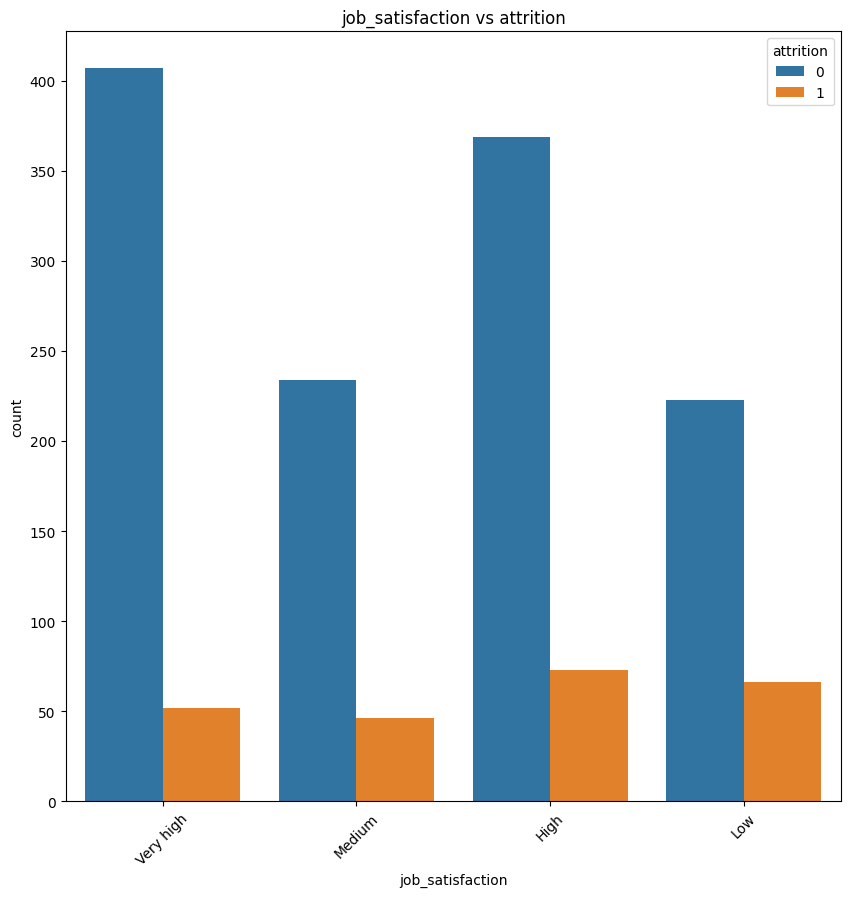


Distribuição percentual de target por job_satisfaction:
 attrition                0         1
job_satisfaction                    
High              0.834842  0.165158
Low               0.771626  0.228374
Medium            0.835714  0.164286
Very high         0.886710  0.113290


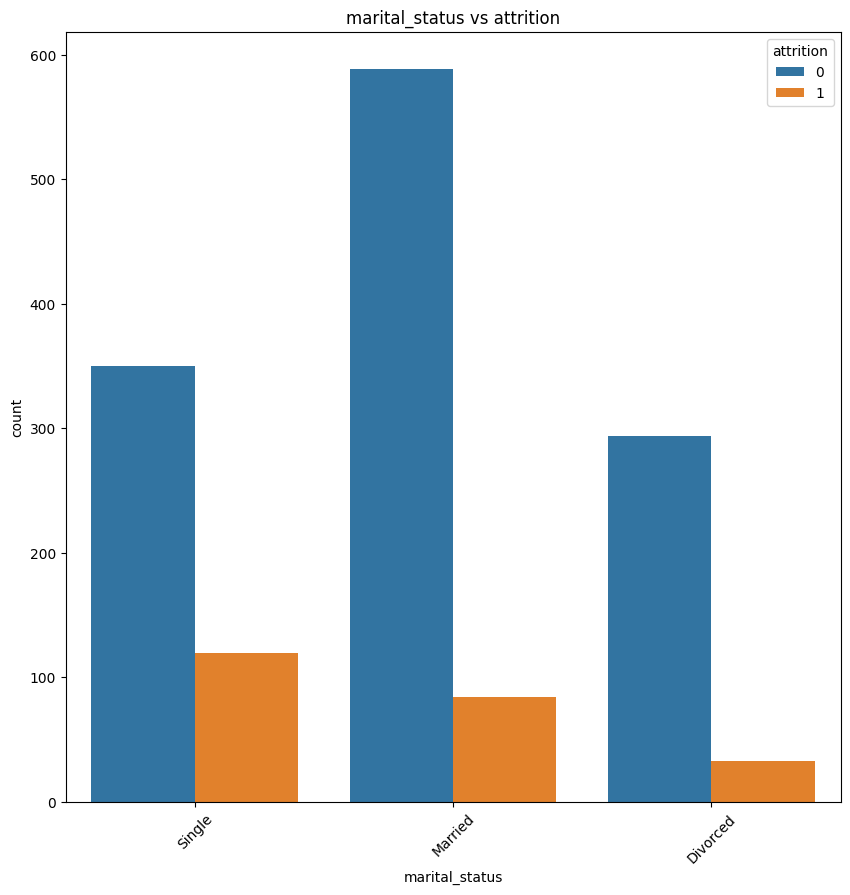


Distribuição percentual de target por marital_status:
 attrition              0         1
marital_status                    
Divorced        0.899083  0.100917
Married         0.875186  0.124814
Single          0.744681  0.255319


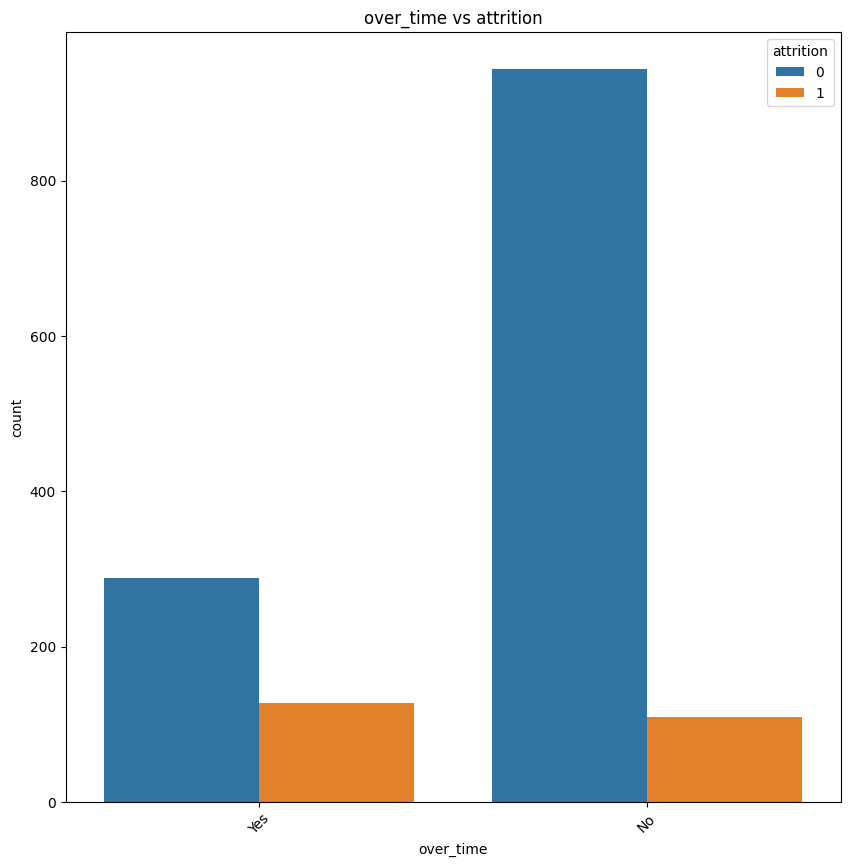


Distribuição percentual de target por over_time:
 attrition         0         1
over_time                    
No         0.895636  0.104364
Yes        0.694712  0.305288


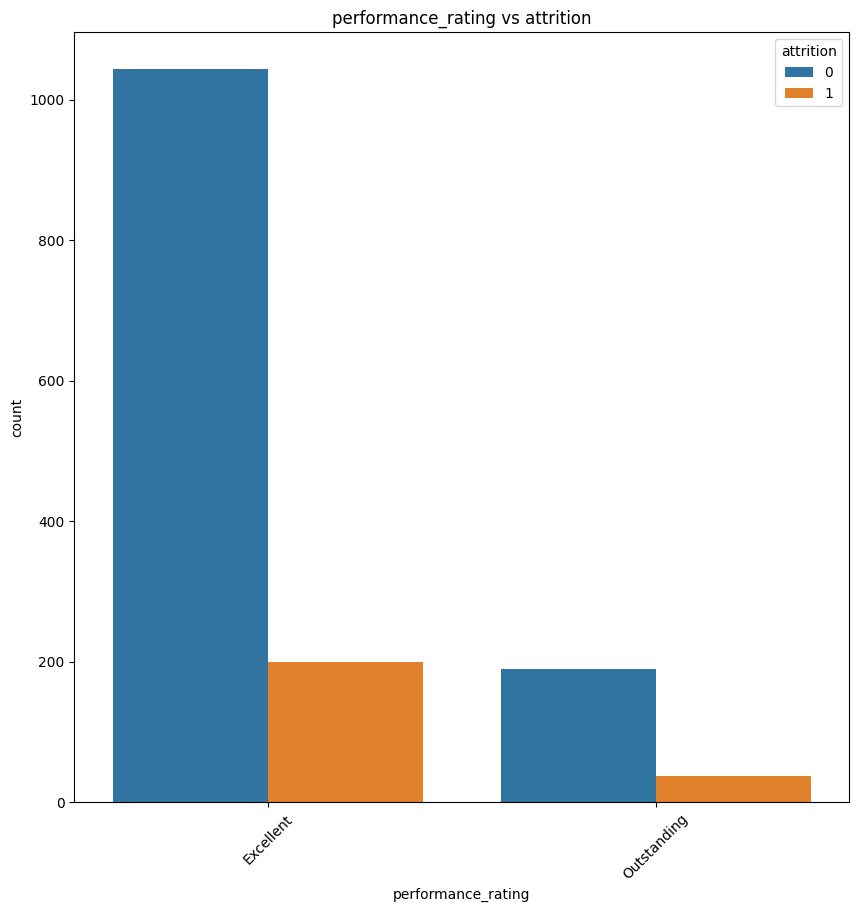


Distribuição percentual de target por performance_rating:
 attrition                  0         1
performance_rating                    
Excellent           0.839228  0.160772
Outstanding         0.836283  0.163717


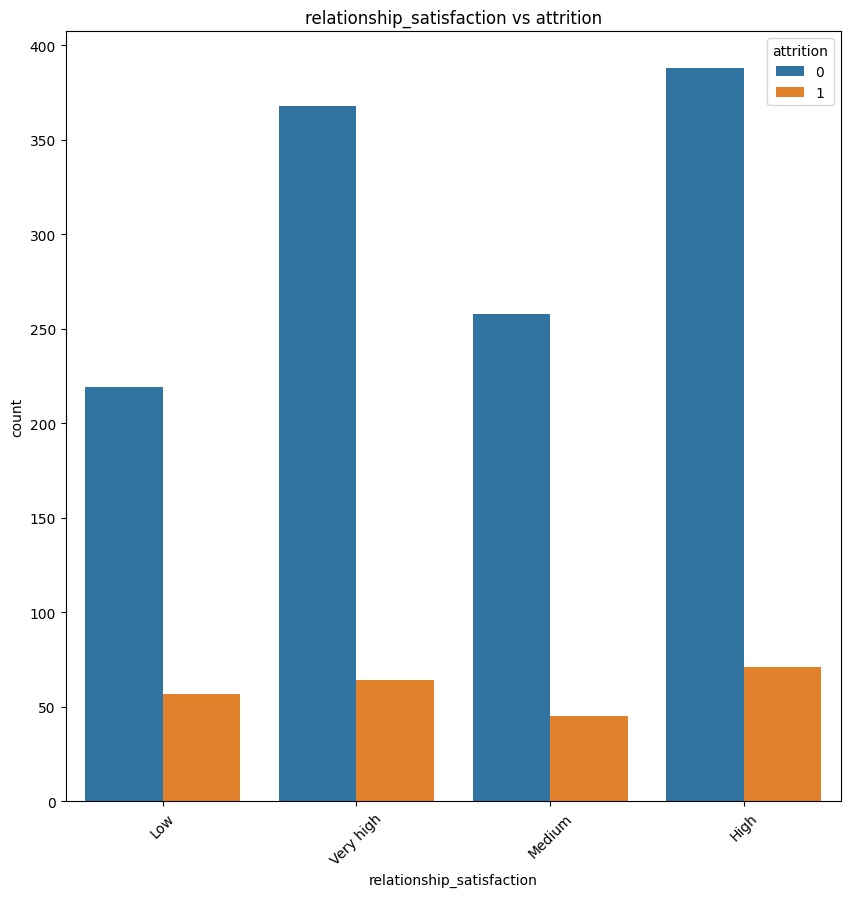


Distribuição percentual de target por relationship_satisfaction:
 attrition                         0         1
relationship_satisfaction                    
High                       0.845316  0.154684
Low                        0.793478  0.206522
Medium                     0.851485  0.148515
Very high                  0.851852  0.148148


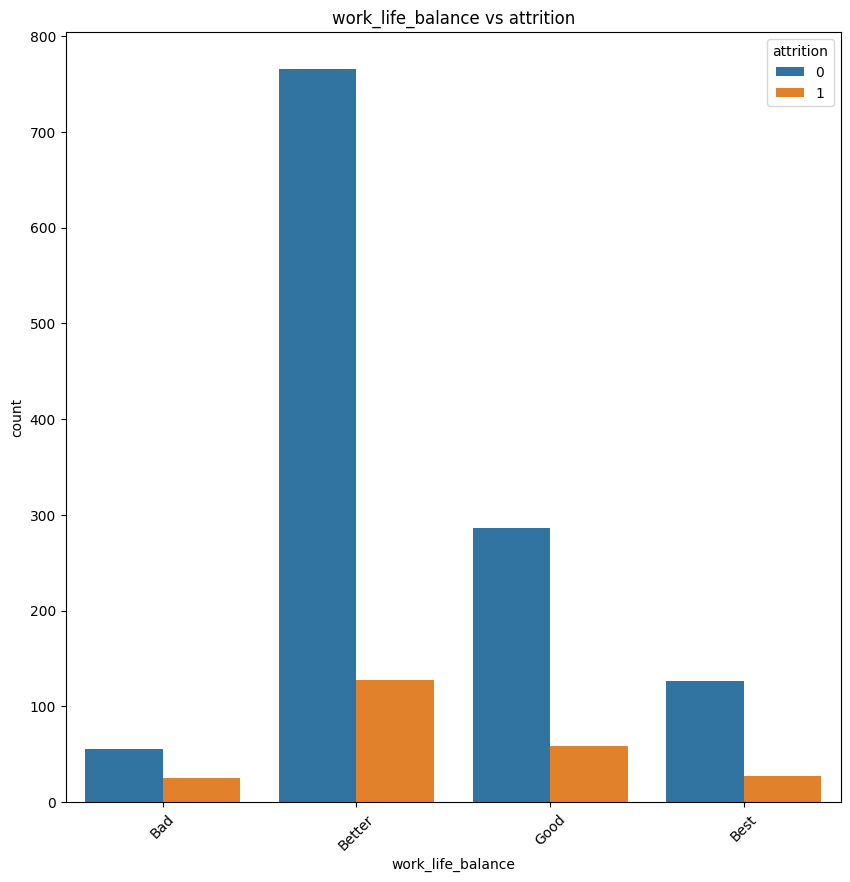


Distribuição percentual de target por work_life_balance:
 attrition                 0         1
work_life_balance                    
Bad                0.687500  0.312500
Best               0.823529  0.176471
Better             0.857783  0.142217
Good               0.831395  0.168605


In [170]:
for col in cat_vars:
    plt.figure(figsize=(10, 10))
    sns.countplot(x=col, hue='attrition', data=dados_rotatividade_ibm)
    plt.title(f'{col} vs attrition')
    plt.xticks(rotation=45)
    plt.show()

    # Tabela cruzada (proporção por classe da target)
    cross = pd.crosstab(dados_rotatividade_ibm[col], dados_rotatividade_ibm['attrition'], normalize='index')
    print(f'\nDistribuição percentual de target por {col}:\n', cross)


### 🔎 Objetivo:

* Identificar **categorias com maior probabilidade de rotatividade**.
* Detectar possíveis variáveis com **poder preditivo**.
* Orientar o processo de engenharia de variáveis e codificação.

## 19. Análise Exploratória das Variáveis Numéricas

Nesta etapa, exploramos as **variáveis numéricas** do dataset para entender seu comportamento geral e sua relação com a variável alvo `attrition`.

### Bloco de código executado:

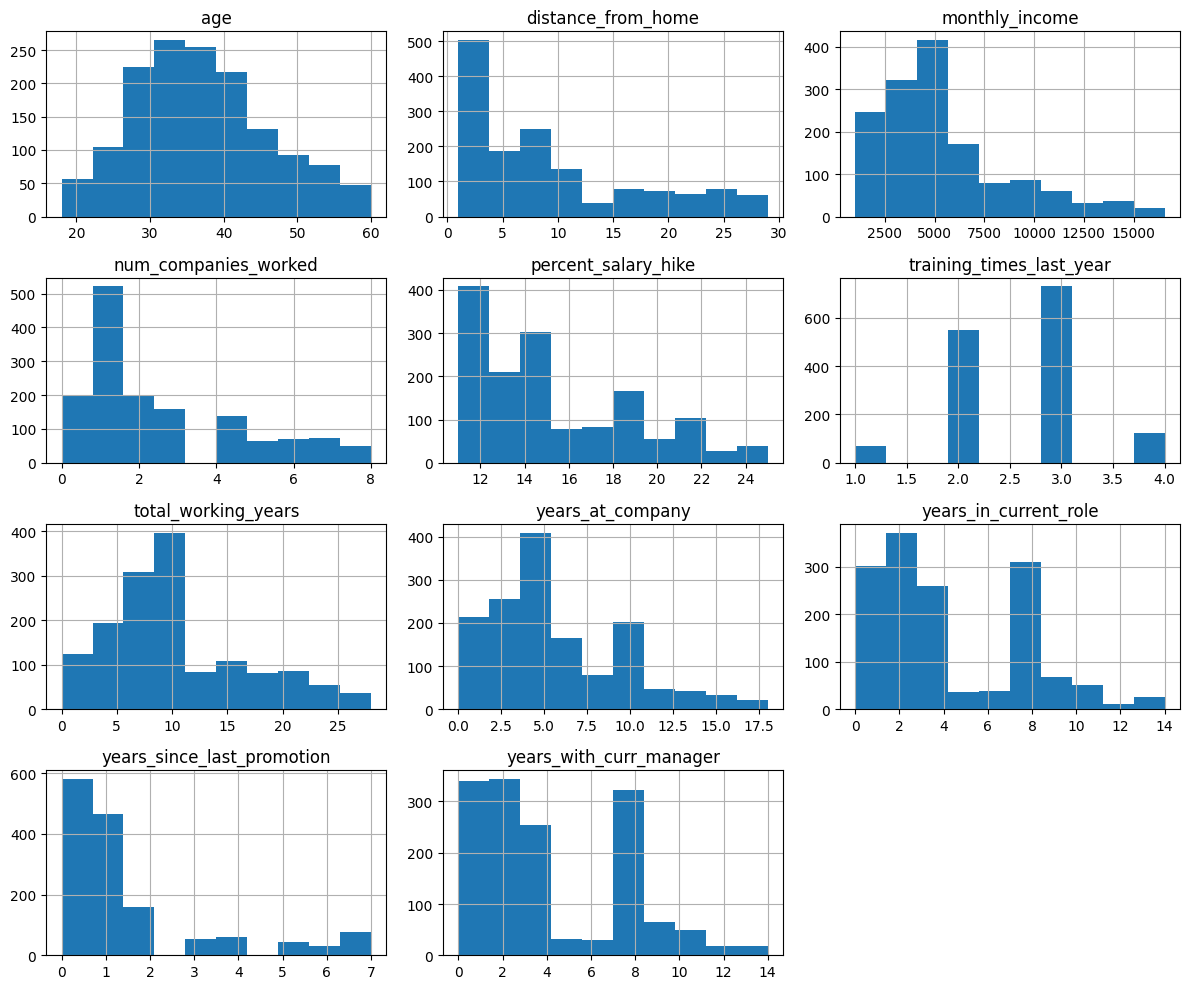

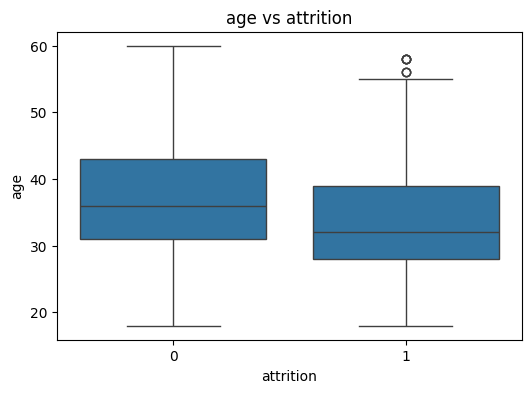

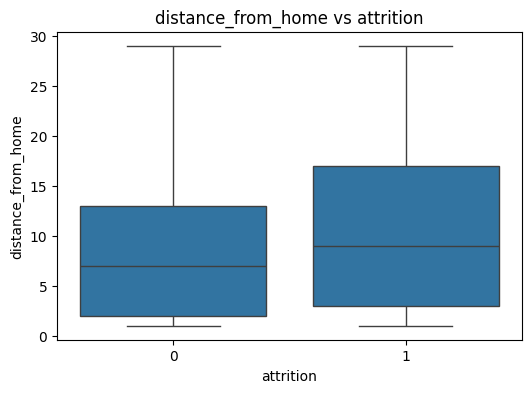

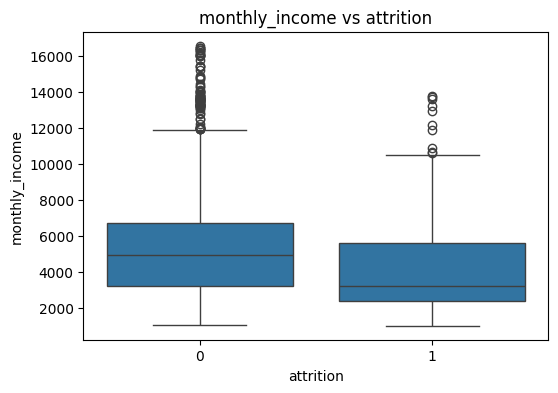

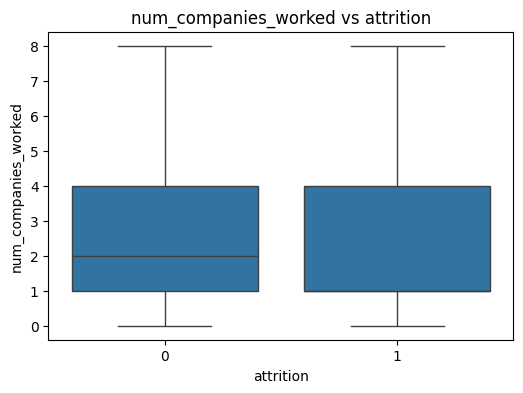

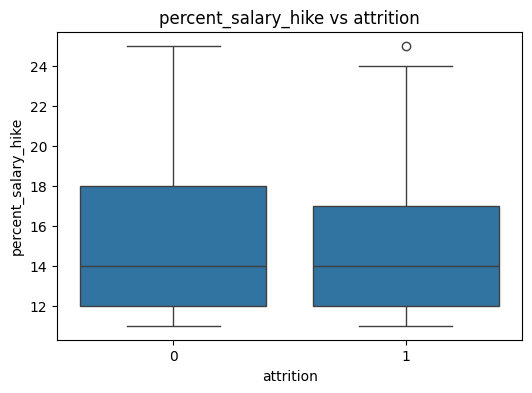

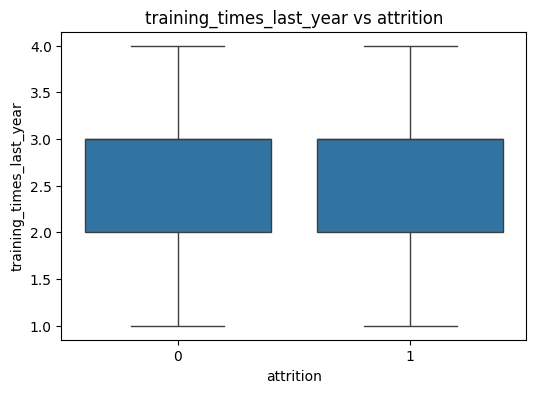

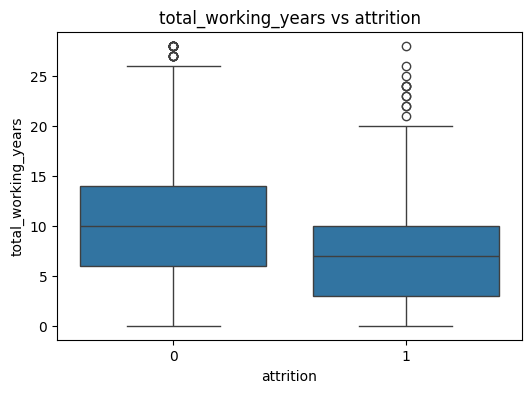

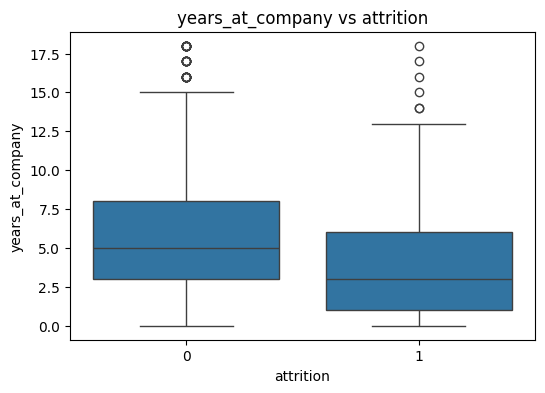

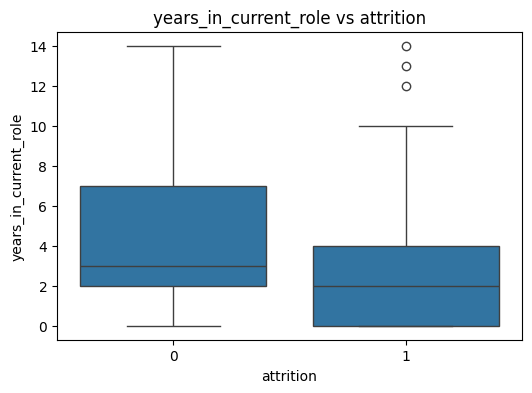

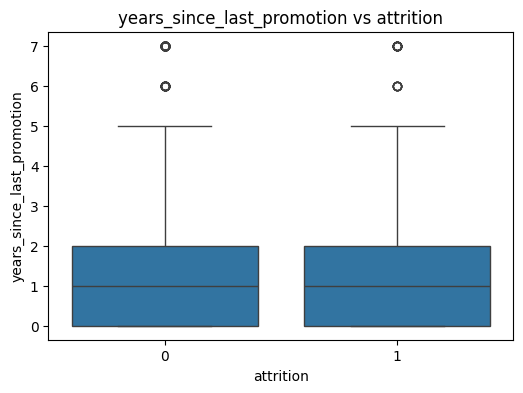

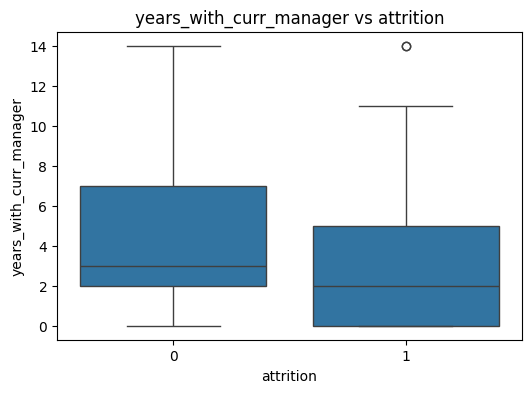

In [171]:
# Histograma
dados_rotatividade_ibm[num_vars].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Boxplots por classe da variável alvo
for col in num_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='attrition', y=col, data=dados_rotatividade_ibm)
    plt.title(f'{col} vs attrition')
    plt.show()


### 🔹 1. Histogramas

Os histogramas ajudam a visualizar:

* A **distribuição das variáveis numéricas** (simétrica, assimétrica, cauda longa, etc.).
* A presença de **valores concentrados ou extremos**.
* Variáveis com distribuições potencialmente problemáticas para modelagem.

---

### 🔸 2. Boxplots segmentados por `attrition`

Os boxplots comparam a distribuição de cada variável numérica **entre os funcionários que saíram e os que permaneceram**. Permitem:

* Identificar **diferenças nos padrões entre as classes**.
* Detectar variáveis que apresentam **separação visual clara** entre `attrition = 0` e `attrition = 1`.
* Apoiar a seleção de variáveis relevantes para a modelagem preditiva.

> 💡 Boxplots são especialmente úteis para destacar **diferenças de mediana**, **dispersão** e **outliers** entre os grupos.

Perfeito! A análise de correlação é uma etapa essencial para entender o relacionamento entre as variáveis e antecipar possíveis problemas de multicolinearidade. Aqui está o markdown explicativo completo para essa parte:

---

````markdown
## 20. Análise de Correlação

Nesta etapa, analisamos a matriz de correlação entre as variáveis numéricas, incluindo a variável alvo `attrition`, para entender o grau de associação entre elas.

### Bloco de código executado:

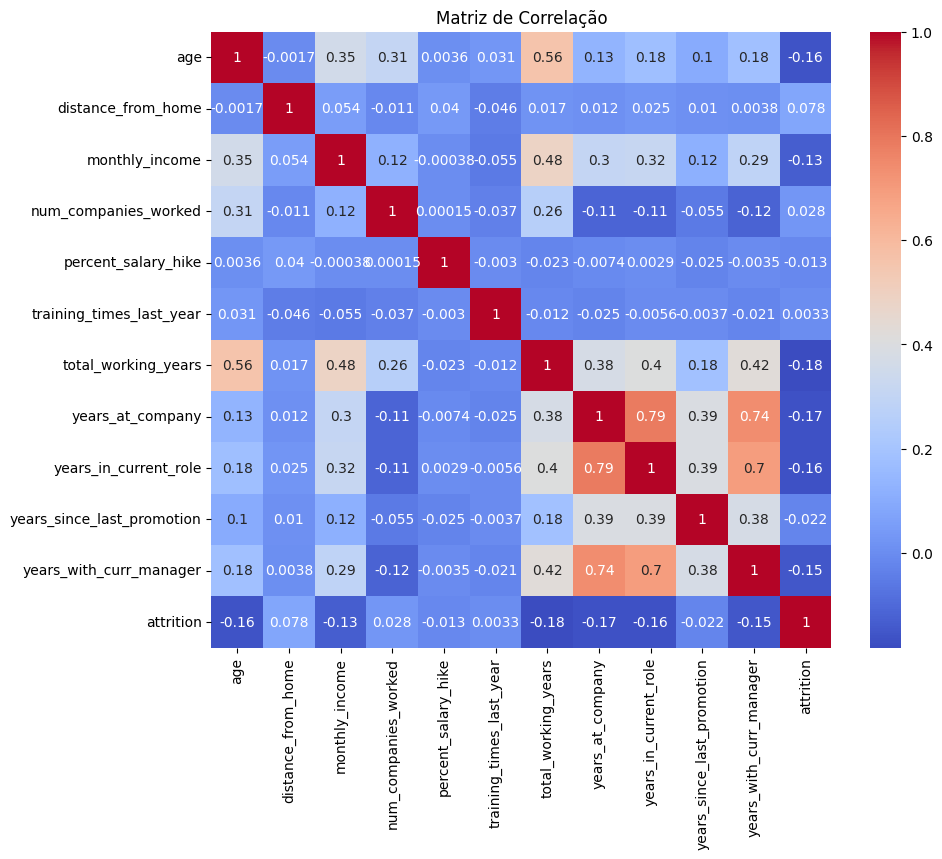

In [172]:
correlation = dados_rotatividade_ibm[num_vars + ['attrition']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


In [173]:
dados_rotatividade_ibm.head()

,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,job_involvement,job_role,job_satisfaction,marital_status,monthly_income,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,training_times_last_year,work_life_balance,total_working_years,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1,Travel_Rarely,Sales,1,Some college,Life Sciences,Medium,Female,High,Sales Executive,Very high,Single,5993,8,Yes,11,Excellent,Low,3,Bad,8,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,No college,Life Sciences,High,Male,Medium,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,Very high,3,Better,10,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,Some college,Other,Very high,Male,Medium,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,Medium,3,Better,7,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,Masters,Life Sciences,Very high,Female,High,Research Scientist,High,Married,2909,1,Yes,11,Excellent,High,3,Better,8,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,No college,Medical,Low,Male,High,Laboratory Technician,Medium,Married,3468,2,No,12,Excellent,Very high,3,Better,6,2,2,2,2


### Objetivos da análise:

* Verificar se **alguma variável independente possui forte correlação com a variável alvo `attrition`**.
* Identificar **correlação forte entre variáveis independentes**, o que pode indicar **redundância de informação** (multicolinearidade).

---

### Observações:

* Nenhuma variável apresentou **correlação forte (>|0.7|)** com a variável dependente `attrition`, indicando que **a relação entre a variável alvo e os preditores é fraca linearmente** — o que é comum em problemas de rotatividade e não inviabiliza a modelagem.
* Algumas variáveis independentes apresentaram **correlação significativa entre si**, o que pode indicar **multicolinearidade**. Isso deve ser levado em consideração especialmente para **modelos lineares** (como regressão logística), pois pode afetar a **estabilidade dos coeficientes** e a **interpretação dos resultados**.

> 📉 Em modelos baseados em árvores (como Random Forest ou XGBoost), a multicolinearidade geralmente não é um problema, mas em modelos estatísticos, pode ser necessário realizar **análise de variância inflacionada (VIF)** ou aplicar técnicas como **seleção de variáveis (ex: stepwise)**.

## 21. Codificação de Variáveis Categóricas e Padronização de Nomes de Colunas

Antes de treinar modelos preditivos, precisamos garantir que todas as variáveis estejam em formato numérico. Para isso, realizamos a **codificação das variáveis categóricas** usando a técnica de **One-Hot Encoding**.

### 1. One-Hot Encoding com `pd.get_dummies()`

Transformamos todas as variáveis categóricas em colunas binárias (0 ou 1), utilizando a função `pd.get_dummies`:

In [174]:
dados_rotatividade_ibm = pd.get_dummies(data=dados_rotatividade_ibm, columns=cat_vars, drop_first=True, dtype='int64')

In [175]:
dados_rotatividade_ibm.head()

,age,attrition,distance_from_home,monthly_income,num_companies_worked,percent_salary_hike,training_times_last_year,total_working_years,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,business_travel_Travel_Frequently,business_travel_Travel_Rarely,department_Research & Development,department_Sales,education_Doctorate,education_Masters,education_No college,education_Some college,education_field_Life Sciences,education_field_Marketing,education_field_Medical,education_field_Other,education_field_Technical Degree,environment_satisfaction_Low,environment_satisfaction_Medium,environment_satisfaction_Very high,gender_Male,job_involvement_Low,job_involvement_Medium,job_involvement_Very high,job_role_Human Resources,job_role_Laboratory Technician,job_role_Manager,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative,job_satisfaction_Low,job_satisfaction_Medium,job_satisfaction_Very high,marital_status_Married,marital_status_Single,over_time_Yes,performance_rating_Outstanding,relationship_satisfaction_Low,relationship_satisfaction_Medium,relationship_satisfaction_Very high,work_life_balance_Best,work_life_balance_Better,work_life_balance_Good
0,41,1,1,5993,8,11,3,8,6,4,0,5,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0
1,49,0,8,5130,1,23,3,10,10,7,1,7,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
2,37,1,2,2090,6,15,3,7,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
3,33,0,3,2909,1,11,3,8,8,7,3,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4,27,0,2,3468,2,12,3,6,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0


* `columns=cat_vars`: aplica a codificação apenas nas colunas categóricas previamente identificadas.
* `drop_first=True`: remove a primeira categoria de cada variável para evitar multicolinearidade (dummy trap) em modelos lineares.
* `dtype='int64'`: força os valores codificados a serem inteiros (0 ou 1), o que é útil para modelos que não aceitam tipos booleanos.

---

### 2. Padronização dos nomes das colunas

Após a codificação, renomeamos todas as colunas para remover espaços e caracteres especiais que poderiam causar problemas na modelagem, especialmente em bibliotecas como `statsmodels`:

In [176]:
dados_rotatividade_ibm.columns = dados_rotatividade_ibm.columns.str.strip().str.replace(' ', '_').str.replace('&', '')

* `str.strip()`: remove espaços no início e fim do nome das colunas.
* `str.replace(' ', '_')`: substitui espaços por underscores.
* `str.replace('&', '')`: remove o caractere `&`.

> ✅ Após essa etapa, todas as colunas estão **em formato numérico**, com **nomes limpos e padronizados**, prontos para análise estatística e modelagem preditiva.

Excelente! Essa etapa marca o início da **modelagem estatística com regressão logística binária** usando `statsmodels`. Você construiu a fórmula dinamicamente com todas as variáveis independentes e ajustou o modelo com a família binomial.

Aqui está o markdown completo e bem detalhado para essa parte do seu notebook:

---

```markdown
## 22. Construção do Modelo de Regressão Logística Binária com `statsmodels`

Nesta etapa, utilizamos a biblioteca `statsmodels` para ajustar um modelo de regressão logística binária. O objetivo é prever a probabilidade de um funcionário deixar a empresa (`attrition = 1`) com base nas variáveis explicativas.

---

### 1. Geração automática da fórmula

Criamos dinamicamente a fórmula para o modelo, incluindo todas as variáveis independentes codificadas:

In [177]:
lista_variaveis = list(dados_rotatividade_ibm.drop(columns='attrition').columns)
formula_dummies = '+'.join(lista_variaveis)
formula_dummies = 'attrition ~ ' + formula_dummies

- A fórmula gerada segue a notação:
  $$
  \text{attrition} \sim \text{var1} + \text{var2} + \ldots + \text{varN}
  $$
---

### 2. Ajuste do modelo com família binomial

Utilizamos a função `glm` (*Generalized Linear Model*) com distribuição binomial para ajustar o modelo:

In [178]:
modelo = smf.glm(formula=formula_dummies, data=dados_rotatividade_ibm, family=sm.families.Binomial()).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              attrition   No. Observations:                 1470
Model:                            GLM   Df Residuals:                     1417
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -430.50
Date:                Mon, 30 Jun 2025   Deviance:                       861.00
Time:                        10:23:49   Pearson chi2:                 3.21e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2575
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             -22.4771   1.27e+04     -0.002      0.999   -2.49e+04    2.49e+04
age                                    -0.0222      0.013     -1.744      0.081      -0.047       0.003
distance_from_home                      0.0460      0.011      4.298      0.000       0.025       0.067
monthly_income                       1.452e-05   4.97e-05      0.292      0.770   -8.29e-05       0.000
num_companies_worked                    0.1568      0.044      3.545      0.000       0.070       0.243
percent_salary_hike                    -0.0344      0.039     -0.883      0.377      -0.111       0.042
training_times_last_year                0.0300      0.125      0.239      0.811      -0.216       0.276
total_working_years                    -0.0699      0.025     -2.777      0.005      -0.119      -0.021
years_at_company                       -0.0174      0.053     -0.329      0.742      -0.121       0.086
years_in_current_role                  -0.0915      0.054     -1.688      0.091      -0.198       0.015
years_since_last_promotion              0.1809      0.052      3.486      0.000       0.079       0.283
years_with_curr_manager                -0.0205      0.050     -0.413      0.679      -0.118       0.077
business_travel_Travel_Frequently       1.8570      0.417      4.455      0.000       1.040       2.674
business_travel_Travel_Rarely           0.9407      0.385      2.446      0.014       0.187       1.695
department_Research__Development       20.1265   1.27e+04      0.002      0.999   -2.49e+04    2.49e+04
department_Sales                       19.4669   1.27e+04      0.002      0.999   -2.49e+04    2.49e+04
education_Doctorate                    -0.4003      0.570     -0.703      0.482      -1.517       0.717
education_Masters                      -0.0741      0.233     -0.317      0.751      -0.531       0.383
education_No_college                   -0.2089      0.290     -0.720      0.471      -0.777       0.360
education_Some_college                 -0.1716      0.252     -0.680      0.497      -0.666       0.323
education_field_Life_Sciences          -0.9882      0.800     -1.235      0.217      -2.557       0.580
education_field_Marketing              -0.6212      0.848     -0.733      0.464      -2.283       1.040
education_field_Medical                -1.0690      0.804     -1.329      0.184      -2.645       0.507
education_field_Other                  -1.1252      0.872     -1.291      0.197      -2.834       0.584
education_field_Technical_Degree       -0.0932      0.818     -0.114      0.909      -1.696       1.509
environment_satisfaction_Low            1.0609      0.247      4.288      0.000       0.576       1.546
environment_satisfaction_Medium         0.0290      0.265      0.11

- `family=sm.families.Binomial()`: especifica que estamos utilizando uma regressão logística (modelo binomial com link logit).
- `modelo.summary()`: exibe os resultados do modelo, incluindo:
  - Coeficientes estimados (`coef`)
  - Erros padrão
  - Estatísticas z
  - P-valores
  - Intervalos de confiança

### Observações importantes:

- Como usamos todas as variáveis no modelo de uma vez, é comum encontrar **coeficientes não significativos** (p-valor > 0.05) e possível **multicolinearidade**.
- Por isso, é recomendável aplicar posteriormente um processo de **seleção de variáveis (ex: Stepwise)** para refinar o modelo e melhorar a interpretabilidade e desempenho.

> 🧠 O modelo de regressão logística é útil tanto para **previsão** quanto para **interpretação estatística**, já que seus coeficientes representam a **influência de cada variável** na probabilidade de saída de um funcionário.

## 23. Seleção de Variáveis com o Método Stepwise

Após o ajuste inicial do modelo de regressão logística, observamos que algumas variáveis possuem **p-values maiores que 0.05**, indicando baixa significância estatística.

Para otimizar o modelo, aplicamos o procedimento **Stepwise**, que realiza uma seleção iterativa das variáveis com base em critérios estatísticos, eliminando variáveis não significativas.

### Código utilizado:

In [179]:
modelo = stepwise(modelo, 0.05)

Regression type: GLM 

Estimating model...: 
 attrition ~ Q('age') + Q('distance_from_home') + Q('monthly_income') + Q('num_companies_worked') + Q('percent_salary_hike') + Q('training_times_last_year') + Q('total_working_years') + Q('years_at_company') + Q('years_in_current_role') + Q('years_since_last_promotion') + Q('years_with_curr_manager') + Q('business_travel_Travel_Frequently') + Q('business_travel_Travel_Rarely') + Q('department_Research__Development') + Q('department_Sales') + Q('education_Doctorate') + Q('education_Masters') + Q('education_No_college') + Q('education_Some_college') + Q('education_field_Life_Sciences') + Q('education_field_Marketing') + Q('education_field_Medical') + Q('education_field_Other') + Q('education_field_Technical_Degree') + Q('environment_satisfaction_Low') + Q('environment_satisfaction_Medium') + Q('environment_satisfaction_Very_high') + Q('gender_Male') + Q('job_involvement_Low') + Q('job_involvement_Medium') + Q('job_involvement_Very_high') + Q('

In [180]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              attrition   No. Observations:                 1470
Model:                            GLM   Df Residuals:                     1442
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -438.94
Date:                Mon, 30 Jun 2025   Deviance:                       877.88
Time:                        10:23:54   Pearson chi2:                 2.97e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2489
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -2.6394      0.693     -3.810      0.000      -3.997      -1.282
Q('age')                                  -0.0250      0.012     -2.078      0.038      -0.049      -0.001
Q('distance_from_home')                    0.0435      0.011      4.139      0.000       0.023       0.064
Q('num_companies_worked')                  0.1538      0.042      3.651      0.000       0.071       0.236
Q('total_working_years')                  -0.0755      0.022     -3.382      0.001      -0.119      -0.032
Q('years_in_current_role')                -0.1136      0.038     -3.026      0.002      -0.187      -0.040
Q('years_since_last_promotion')            0.1767      0.049      3.600      0.000       0.081       0.273
Q('business_travel_Travel_Frequently')     1.8365      0.405      4.536      0.000       1.043       2.630
Q('business_travel_Travel_Rarely')         0.9512      0.375      2.539      0.011       0.217       1.685
Q('education_field_Life_Sciences')        -0.6685      0.234     -2.854      0.004      -1.128      -0.209
Q('education_field_Medical')              -0.7626      0.252     -3.024      0.002      -1.257      -0.268
Q('education_field_Other')                -0.8836      0.430     -2.054      0.040      -1.727      -0.040
Q('environment_satisfaction_Low')          1.1088      0.206      5.383      0.000       0.705       1.513
Q('gender_Male')                           0.4124      0.183      2.258      0.024       0.054       0.770
Q('job_involvement_Low')                   1.5197      0.321      4.732      0.000       0.890       2.149
Q('job_involvement_Medium')                0.4494      0.198      2.272      0.023       0.062       0.837
Q('job_role_Human_Resources')              1.0834      0.424      2.556      0.011       0.253       1.914
Q('job_role_Laboratory_Technician')        1.0300      0.237      4.348      0.000       0.566       1.494
Q('job_role_Sales_Executive')              0.5733      0.241      2.378      0.017       0.101       1.046
Q('job_role_Sales_Representative')         1.4479      0.340      4.258      0.000       0.781       2.114
Q('job_satisfaction_Low')                  0.5882      0.214      2.752      0.006       0.169       1.007
Q('job_satisfaction_Very_high')           -0.7465      0.218     -3.425      0.001      -1.174      -0.319
Q('marital_status_Single')                 1.1205      0.182      6.157      0.000       0.764       1.477
Q('over_time_Yes')                         2.0273      0.191     10.611      0.000       1.653       2.402
Q('relationship_satisfaction_Low')         0.7849      0.210      3.738      0.000       0.373       1.196
Q('work_life_balance_Best')               -0.9650      0.396     -2.434      0.015     

* O parâmetro `0.05` define o nível de significância adotado para manter as variáveis no modelo.
* O procedimento inclui e/ou exclui variáveis de forma automática, buscando um modelo mais **parcimonioso** e **interpretável**.

### Benefícios do Stepwise:

* Melhora a **qualidade do modelo**, reduzindo overfitting.
* Facilita a **interpretação dos coeficientes**.
* Pode aumentar a **capacidade preditiva** ao eliminar variáveis irrelevantes.

## 24. Geração das Probabilidades Preditas e Avaliação do Modelo com Matriz de Confusão

Após ajustar e refinar o modelo de regressão logística, calculamos as probabilidades preditas de rotatividade para cada funcionário e avaliamos a performance do modelo utilizando uma matriz de confusão.

### 1. Geração das probabilidades preditas (`phat`)

Usamos o método `.predict()` do modelo para obter a probabilidade estimada de `attrition = 1`:

In [181]:
dados_rotatividade_ibm['phat'] = modelo.predict()

- Cada valor em `phat` representa a probabilidade de saída da empresa para o respectivo funcionário.

### 2. Matriz de confusão com cutoff personalizado

Para transformar as probabilidades em classificações binárias, definimos um **limiar (cutoff) de 0.18**:

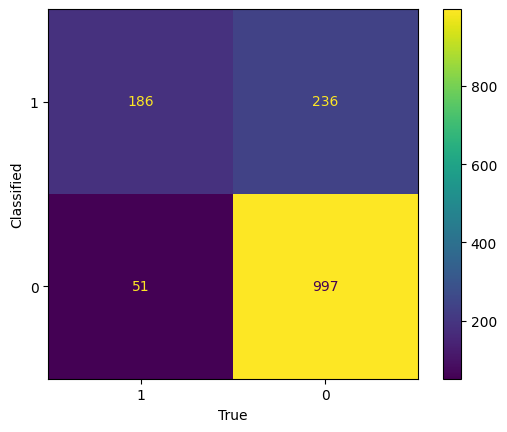

,Sensitividade,Especificidade,Acurácia
0,0.78481,0.808597,0.804762


In [182]:
frb.matriz_confusao(observado=dados_rotatividade_ibm['attrition'], predicts=dados_rotatividade_ibm['phat'], cutoff=0.18)

- Valores maiores ou iguais a 0.18 são classificados como `1` (prevê saída).
- Valores menores que 0.18 são classificados como `0` (prevê permanência).

### Por que usar um cutoff menor que 0.5?

- Como a base de dados está desbalanceada, utilizar o cutoff padrão 0.5 pode reduzir a sensibilidade do modelo.
- Um cutoff menor pode melhorar a **detecção de funcionários com maior risco de rotatividade**, reduzindo falsos negativos.

### Interpretação da Matriz de Confusão

A matriz de confusão gerada apresenta um **heatmap** visual e também calcula as métricas importantes para avaliar o desempenho do modelo:

* **Sensitividade (Recall)**: 0.78481
  Indica a proporção de funcionários que saíram da empresa e foram corretamente identificados pelo modelo (verdadeiros positivos).

* **Especificidade**: 0.80860
  Representa a proporção de funcionários que permaneceram e foram corretamente classificados como tal (verdadeiros negativos).

* **Acurácia**: 0.80476
  Mede a proporção total de classificações corretas (tanto saídas quanto permanências) realizadas pelo modelo.

> ⚠️ O cutoff foi definido como 0.18 (menor que o padrão 0.5) devido ao **desbalanceamento da variável alvo `attrition`**, permitindo um melhor equilíbrio entre Sensitividade e Especificidade para capturar os casos de rotatividade com mais eficiência.

## 25. Análise Detalhada da Performance do Modelo: Sensitividade, Especificidade e Curva ROC

Após a avaliação inicial com matriz de confusão, aprofundamos a análise do desempenho do modelo utilizando gráficos que ilustram a relação entre sensibilidade, especificidade e diferentes pontos de corte (cutoff), além da Curva ROC.

### 1. Gráfico de Sensitividade e Especificidade em função do cutoff

Utilizamos a função personalizada para visualizar como as métricas de Sensitividade (Recall) e Especificidade variam conforme o limiar de decisão:

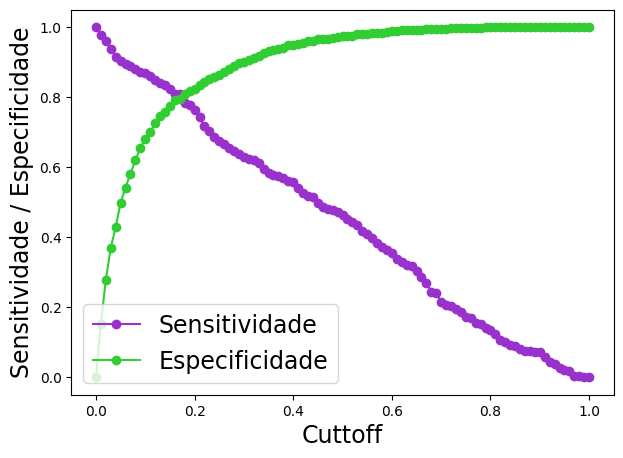

In [183]:
frb.grafico_sensitividade_especificidade(observado=dados_rotatividade_ibm['attrition'], predicts=dados_rotatividade_ibm['phat'])

* Este gráfico auxilia na escolha do cutoff ideal, equilibrando a capacidade do modelo de identificar corretamente tanto os funcionários que saem quanto os que permanecem.
* Permite observar o trade-off entre **sensibilidade** (capturar a classe positiva) e **especificidade** (capturar a classe negativa).

### 2. Curva ROC (Receiver Operating Characteristic)

Em seguida, geramos a Curva ROC para avaliar o desempenho do modelo em termos de sua capacidade de discriminação entre as classes:

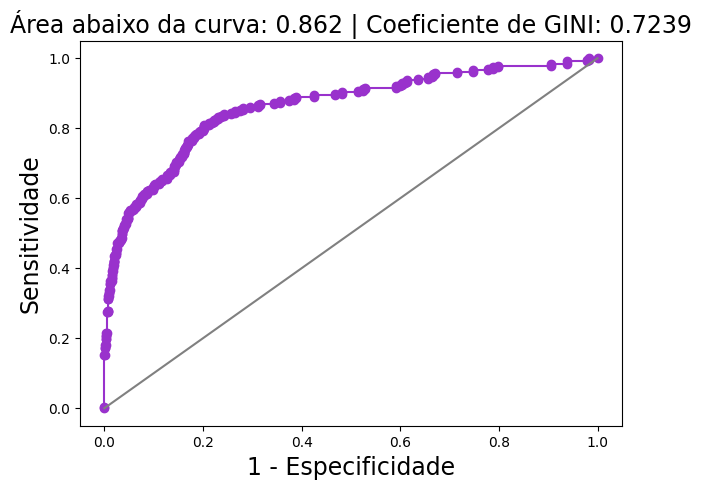

In [184]:
frb.curva_roc(observado=dados_rotatividade_ibm['attrition'], previsto=dados_rotatividade_ibm['phat'])

* A curva ROC plota a **Taxa de Verdadeiros Positivos (sensibilidade)** contra a **Taxa de Falsos Positivos (1 - especificidade)** para vários valores de cutoff.
* A área sob a curva (AUC) é uma medida agregada da performance do modelo, variando de 0.5 (modelo aleatório) a 1 (modelo perfeito).

### Importância dessas análises

* A combinação desses gráficos permite escolher o melhor cutoff para o modelo, especialmente em cenários de dados desbalanceados.
* A Curva ROC e o AUC fornecem uma avaliação robusta e independente do cutoff escolhido.
* Essas ferramentas são essenciais para garantir que o modelo tenha bom desempenho preditivo e seja confiável para a tomada de decisão.

## 26. Balanceamento da Variável Alvo com SMOTE

Devido ao desbalanceamento significativo da variável alvo `attrition` (muito mais registros da classe 0 do que da classe 1), aplicamos a técnica de **SMOTE (Synthetic Minority Over-sampling Technique)** para equilibrar as classes, gerando amostras sintéticas da classe minoritária.

### 1. Remoção temporária da coluna de probabilidades preditas

Para garantir que a nova análise seja realizada em um dataset limpo, removemos a coluna `phat` gerada na etapa anterior:

In [185]:
dados_rotatividade_ibm.drop(columns='phat', inplace=True)

### 2. Preparação e Aplicação dos dados com SMOTE

Separamos as variáveis independentes (`X`) da variável alvo (`y`) e logo em seguida criamos o objeto SMOTE e aplicamos o balanceamento:

In [186]:
from imblearn.over_sampling import SMOTE

X = dados_rotatividade_ibm.drop('attrition', axis=1)
y = dados_rotatividade_ibm['attrition']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


* O SMOTE sintetiza novas amostras da classe minoritária (`attrition = 1`), equilibrando a quantidade de registros entre as classes.
* `random_state=42` garante reprodutibilidade do processo.

### 4. Reconstituição do DataFrame balanceado

Finalmente, juntamos as variáveis independentes e a variável alvo balanceada em um novo dataframe:

In [187]:
dados_rotatividade_ibm = pd.concat([X_res, y_res], axis=1)

In [188]:
dados_rotatividade_ibm.head()

,age,distance_from_home,monthly_income,num_companies_worked,percent_salary_hike,training_times_last_year,total_working_years,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,business_travel_Travel_Frequently,business_travel_Travel_Rarely,department_Research__Development,department_Sales,education_Doctorate,education_Masters,education_No_college,education_Some_college,education_field_Life_Sciences,education_field_Marketing,education_field_Medical,education_field_Other,education_field_Technical_Degree,environment_satisfaction_Low,environment_satisfaction_Medium,environment_satisfaction_Very_high,gender_Male,job_involvement_Low,job_involvement_Medium,job_involvement_Very_high,job_role_Human_Resources,job_role_Laboratory_Technician,job_role_Manager,job_role_Manufacturing_Director,job_role_Research_Director,job_role_Research_Scientist,job_role_Sales_Executive,job_role_Sales_Representative,job_satisfaction_Low,job_satisfaction_Medium,job_satisfaction_Very_high,marital_status_Married,marital_status_Single,over_time_Yes,performance_rating_Outstanding,relationship_satisfaction_Low,relationship_satisfaction_Medium,relationship_satisfaction_Very_high,work_life_balance_Best,work_life_balance_Better,work_life_balance_Good,attrition
0,41,1,5993,8,11,3,8,6,4,0,5,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1
1,49,8,5130,1,23,3,10,10,7,1,7,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
2,37,2,2090,6,15,3,7,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1
3,33,3,2909,1,11,3,8,8,7,3,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,27,2,3468,2,12,3,6,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0


### Considerações:

* O balanceamento com SMOTE é fundamental para melhorar a capacidade do modelo em detectar corretamente os funcionários que saem (classe minoritária).
* Após essa etapa, o dataset está pronto para uma nova rodada de modelagem, agora com classes equilibradas.

Aqui está o markdown explicativo para essa etapa de visualização da nova distribuição da variável alvo após o balanceamento com SMOTE:

## 27. Visualização da Nova Distribuição da Variável Alvo Após Balanceamento

Após aplicar o SMOTE para balancear as classes da variável alvo `attrition`, verificamos a nova distribuição para confirmar o sucesso do balanceamento.

### Código utilizado:

attrition
1    0.5
0    0.5
Name: proportion, dtype: float64


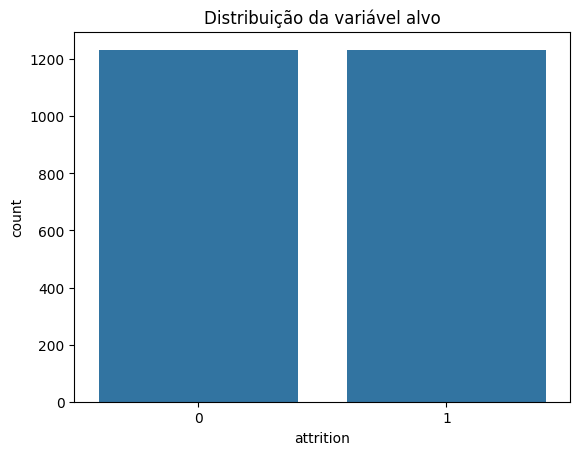

In [189]:
# Distribuição da variável alvo
print(dados_rotatividade_ibm['attrition'].value_counts(normalize=True))
sns.countplot(x='attrition', data=dados_rotatividade_ibm)
plt.title("Distribuição da variável alvo")
plt.show()

### Interpretação:

* O método `value_counts(normalize=True)` mostra a proporção relativa das classes no dataset balanceado.
* O gráfico de barras (`countplot`) permite visualizar visualmente o equilíbrio entre as classes `0` e `1`.

### Resultado esperado:

* As classes `0` (funcionários que permaneceram) e `1` (funcionários que saíram) apresentam agora **quantidades aproximadamente iguais**, indicando que o dataset está balanceado.
* Esse equilíbrio é fundamental para que modelos de classificação aprendam igualmente bem a distinguir ambas as classes.

> ✅ Confirmar o balanceamento é um passo importante antes de realizar uma nova rodada de treinamento e avaliação do modelo.

Claro! Aqui está o markdown explicativo para essa nova rodada de modelagem após o balanceamento dos dados:

## 28. Novo Ajuste do Modelo de Regressão Logística Após Balanceamento com SMOTE

Com o dataset agora balanceado, realizamos uma nova modelagem de regressão logística para prever a variável alvo `attrition`.

### 1. Preparação da fórmula do modelo

Geramos novamente a fórmula que inclui todas as variáveis independentes codificadas:

In [190]:
lista_variaveis = list(dados_rotatividade_ibm.drop(columns='attrition').columns)
formula_dummies = '+'.join(lista_variaveis)
formula_dummies = 'attrition ~ ' + formula_dummies


### 2. Ajuste do modelo

Ajustamos o modelo de regressão logística utilizando a função `glm` com família binomial:

In [191]:
modelo = smf.glm(formula=formula_dummies, data=dados_rotatividade_ibm, family=sm.families.Binomial()).fit()

In [192]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              attrition   No. Observations:                 2466
Model:                            GLM   Df Residuals:                     2413
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -575.02
Date:                Mon, 30 Jun 2025   Deviance:                       1150.0
Time:                        10:23:57   Pearson chi2:                 5.48e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6015
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              11.0267      1.003     10.999      0.000       9.062      12.992
age                                    -0.0227      0.011     -1.976      0.048      -0.045      -0.000
distance_from_home                      0.0325      0.010      3.364      0.001       0.014       0.051
monthly_income                      -9.674e-06   4.05e-05     -0.239      0.811   -8.91e-05    6.97e-05
num_companies_worked                    0.1125      0.039      2.870      0.004       0.036       0.189
percent_salary_hike                    -0.0367      0.032     -1.141      0.254      -0.100       0.026
training_times_last_year               -0.1214      0.110     -1.104      0.270      -0.337       0.094
total_working_years                    -0.0694      0.022     -3.224      0.001      -0.112      -0.027
years_at_company                       -0.0235      0.041     -0.570      0.569      -0.104       0.057
years_in_current_role                  -0.0654      0.047     -1.386      0.166      -0.158       0.027
years_since_last_promotion              0.1902      0.046      4.130      0.000       0.100       0.280
years_with_curr_manager                -0.0214      0.039     -0.548      0.584      -0.098       0.055
business_travel_Travel_Frequently       0.4961      0.270      1.836      0.066      -0.033       1.026
business_travel_Travel_Rarely          -0.1300      0.224     -0.580      0.562      -0.569       0.309
department_Research__Development       -3.0696      0.667     -4.604      0.000      -4.376      -1.763
department_Sales                       -0.1528      1.102     -0.139      0.890      -2.313       2.007
education_Doctorate                    -1.0860      0.563     -1.930      0.054      -2.189       0.017
education_Masters                      -0.6334      0.205     -3.096      0.002      -1.034      -0.232
education_No_college                   -0.6863      0.271     -2.536      0.011      -1.217      -0.156
education_Some_college                 -0.7133      0.231     -3.091      0.002      -1.166      -0.261
education_field_Life_Sciences          -4.2293      0.437     -9.672      0.000      -5.086      -3.372
education_field_Marketing              -3.6979      0.487     -7.595      0.000      -4.652      -2.744
education_field_Medical                -4.2602      0.445     -9.566      0.000      -5.133      -3.387
education_field_Other                  -4.1623      0.552     -7.546      0.000      -5.243      -3.081
education_field_Technical_Degree       -3.6067      0.489     -7.374      0.000      -4.565      -2.648
environment_satisfaction_Low            0.5095      0.215      2.372      0.018       0.089       0.930
environment_satisfaction_Medium        -0.4788      0.244     -1.96

### Considerações:

* Com as classes balanceadas, o modelo tende a apresentar coeficientes mais estáveis e significativos.
* A interpretação dos coeficientes passa a refletir melhor a influência das variáveis na probabilidade de rotatividade.
* É recomendável avaliar as métricas de performance deste novo modelo para validar melhorias em relação à modelagem anterior.

> 🧠 Essa etapa representa a aplicação prática da técnica de balanceamento de classes para melhorar a capacidade preditiva do modelo em cenários com dados desbalanceados.

## 29. Refinamento do Modelo com Seleção Stepwise Após Balanceamento

Após ajustar o modelo de regressão logística com os dados balanceados, aplicamos o método **Stepwise** para realizar a seleção automática das variáveis estatisticamente significantes.

### Código utilizado:

In [193]:
modelo = stepwise(modelo, 0.05)

Regression type: GLM 

Estimating model...: 
 attrition ~ Q('age') + Q('distance_from_home') + Q('monthly_income') + Q('num_companies_worked') + Q('percent_salary_hike') + Q('training_times_last_year') + Q('total_working_years') + Q('years_at_company') + Q('years_in_current_role') + Q('years_since_last_promotion') + Q('years_with_curr_manager') + Q('business_travel_Travel_Frequently') + Q('business_travel_Travel_Rarely') + Q('department_Research__Development') + Q('department_Sales') + Q('education_Doctorate') + Q('education_Masters') + Q('education_No_college') + Q('education_Some_college') + Q('education_field_Life_Sciences') + Q('education_field_Marketing') + Q('education_field_Medical') + Q('education_field_Other') + Q('education_field_Technical_Degree') + Q('environment_satisfaction_Low') + Q('environment_satisfaction_Medium') + Q('environment_satisfaction_Very_high') + Q('gender_Male') + Q('job_involvement_Low') + Q('job_involvement_Medium') + Q('job_involvement_Very_high') + Q('

In [194]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              attrition   No. Observations:                 2466
Model:                            GLM   Df Residuals:                     2426
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -578.11
Date:                Mon, 30 Jun 2025   Deviance:                       1156.2
Time:                        10:24:01   Pearson chi2:                 6.12e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6005
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   10.2014      0.845     12.078      0.000       8.546      11.857
Q('age')                                    -0.0238      0.011     -2.109      0.035      -0.046      -0.002
Q('distance_from_home')                      0.0321      0.010      3.358      0.001       0.013       0.051
Q('num_companies_worked')                    0.1210      0.038      3.159      0.002       0.046       0.196
Q('total_working_years')                    -0.0722      0.019     -3.753      0.000      -0.110      -0.034
Q('years_in_current_role')                  -0.0964      0.032     -3.033      0.002      -0.159      -0.034
Q('years_since_last_promotion')              0.1778      0.045      3.982      0.000       0.090       0.265
Q('business_travel_Travel_Frequently')       0.5956      0.194      3.069      0.002       0.215       0.976
Q('department_Research__Development')       -3.1911      0.645     -4.948      0.000      -4.455      -1.927
Q('education_Doctorate')                    -1.1529      0.561     -2.054      0.040      -2.253      -0.053
Q('education_Masters')                      -0.6470      0.202     -3.195      0.001      -1.044      -0.250
Q('education_No_college')                   -0.7032      0.268     -2.620      0.009      -1.229      -0.177
Q('education_Some_college')                 -0.7123      0.226     -3.153      0.002      -1.155      -0.270
Q('education_field_Life_Sciences')          -4.2945      0.416    -10.321      0.000      -5.110      -3.479
Q('education_field_Marketing')              -3.7469      0.461     -8.122      0.000      -4.651      -2.843
Q('education_field_Medical')                -4.3500      0.426    -10.223      0.000      -5.184      -3.516
Q('education_field_Other')                  -4.2647      0.531     -8.030      0.000      -5.306      -3.224
Q('education_field_Technical_Degree')       -3.6889      0.468     -7.878      0.000      -4.607      -2.771
Q('environment_satisfaction_Low')            0.4732      0.212      2.237      0.025       0.059       0.888
Q('environment_satisfaction_Medium')        -0.4823      0.241     -1.999      0.046      -0.955      -0.009
Q('environment_satisfaction_Very_high')     -0.7875      0.202     -3.899      0.000      -1.183      -0.392
Q('job_involvement_Low')                     0.9682      0.305      3.173      0.002       0.370       1.566
Q('job_involvement_Very_high')              -1.2730      0.343     -3.716      0.000      -1.945      -0.602
Q('job_role_Human_Resources')               -5.9167      0.844     -7.012      0.000      -7.571      -4.263
Q('job_role_Manager')                       -4.0918      0.813     -5.030      0.000      -5.686      -2.498
Q('job_role_Manufacturing_Direc

- O parâmetro `0.05` define o nível de significância para manter variáveis no modelo.
- O Stepwise ajuda a eliminar variáveis não significativas, simplificando o modelo e potencialmente melhorando sua performance e interpretabilidade.

## 30. Predição e Avaliação do Modelo com Novo Cutoff Após Balanceamento

Após a seleção final das variáveis com Stepwise, geramos as probabilidades preditas e avaliamos o desempenho do modelo com uma matriz de confusão, utilizando um novo cutoff ajustado.

### 1. Geração das probabilidades preditas (`phat`):

In [195]:
dados_rotatividade_ibm['phat'] = modelo.predict()

* Cada valor representa a probabilidade estimada de `attrition = 1` para cada funcionário.

### 2. Avaliação com matriz de confusão usando cutoff 0.38

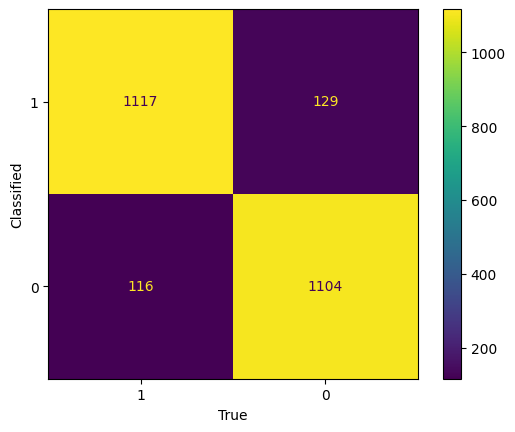

,Sensitividade,Especificidade,Acurácia
0,0.905921,0.895377,0.900649


In [196]:
frb.matriz_confusao(observado=dados_rotatividade_ibm['attrition'], predicts=dados_rotatividade_ibm['phat'], cutoff=0.38)

* O cutoff foi ajustado para **0.38** para otimizar a performance do modelo no dataset balanceado.
* Valores acima de 0.38 são classificados como `1` (prevê saída), abaixo como `0`.

### 3. Métricas obtidas:

* **Sensitividade (Recall): 0.9059**
  O modelo identifica corretamente aproximadamente 90.6% dos funcionários que saíram.

* **Especificidade: 0.8954**
  O modelo classifica corretamente aproximadamente 89.5% dos funcionários que permaneceram.

* **Acurácia: 0.9006**
  O modelo acerta cerca de 90.1% das classificações totais.

### Insights:

* Houve uma melhora significativa nas métricas de performance em relação à modelagem anterior, graças ao balanceamento dos dados e à seleção de variáveis.
* O cutoff diferente reflete a nova distribuição balanceada das classes e a necessidade de ajustar o limiar para maximizar o desempenho.
* Essas métricas indicam que o modelo está eficaz tanto em identificar funcionários que saem quanto os que permanecem.

## 31. Gráfico de Sensitividade e Especificidade para o Modelo Final

Para analisar o desempenho do modelo em diferentes valores de cutoff, geramos o gráfico que mostra a variação da Sensitividade (Recall) e Especificidade conforme o limiar de decisão.

### Código utilizado:

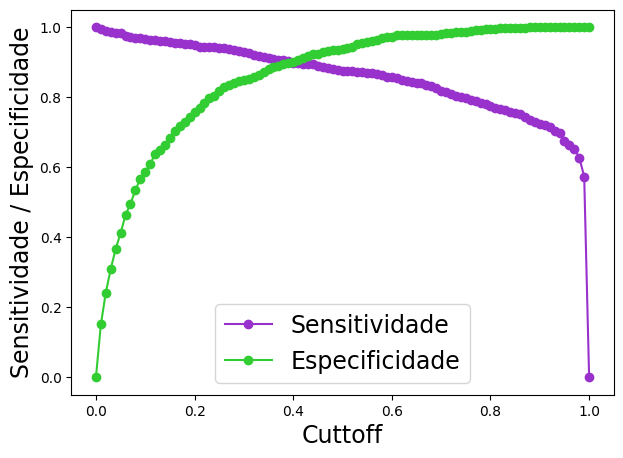

In [197]:
frb.grafico_sensitividade_especificidade(observado=dados_rotatividade_ibm['attrition'], predicts=dados_rotatividade_ibm['phat'])

### Objetivos do gráfico:

* Visualizar como as métricas de Sensitividade e Especificidade se comportam em diferentes pontos de corte.
* Auxiliar na escolha do cutoff ideal para equilibrar a taxa de verdadeiros positivos e verdadeiros negativos.
* Garantir que o modelo esteja ajustado para atender aos objetivos do negócio, seja priorizando a detecção de rotatividade ou minimizando falsos positivos.

> 📈 Esse gráfico é fundamental para entender o trade-off entre Sensitividade e Especificidade e definir o melhor limiar para classificação.

## 32. Avaliação Final com Curva ROC (Receiver Operating Characteristic)

Para avaliar a **capacidade discriminativa** do modelo final, geramos a **Curva ROC**, que analisa o desempenho do classificador em todos os possíveis valores de cutoff.

### Código utilizado:

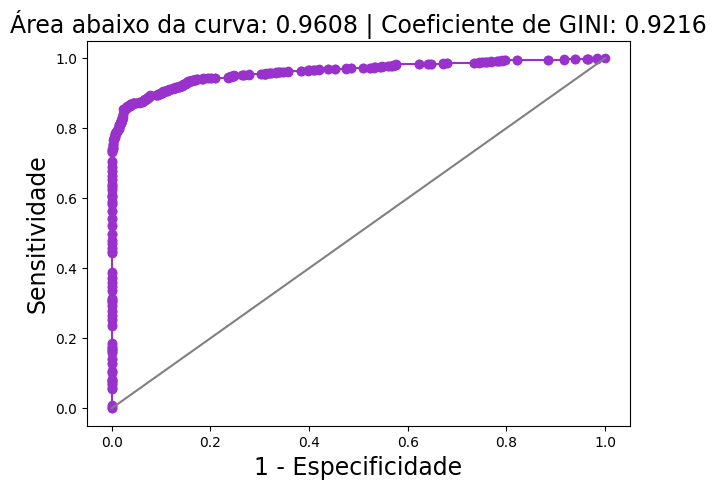

In [198]:
frb.curva_roc(observado=dados_rotatividade_ibm['attrition'], previsto=dados_rotatividade_ibm['phat'])

### O que é a Curva ROC?

* A ROC (Receiver Operating Characteristic) compara a **Taxa de Verdadeiros Positivos (Sensitividade)** com a **Taxa de Falsos Positivos (1 - Especificidade)** em diferentes limiares.
* A área sob a curva (**AUC - Area Under the Curve**) é um indicador do poder de separação do modelo:

  * AUC = 0.5 → desempenho aleatório
  * AUC ≥ 0.7 → bom modelo
  * AUC ≥ 0.9 → excelente modelo

### Benefícios:

* **Independente do cutoff**: avalia o modelo como um todo, sem depender de um ponto de corte específico.
* Permite comparar modelos diferentes de forma justa e objetiva.
* Ajuda na seleção de modelos mais robustos para aplicações reais.

> ✅ Uma **AUC elevada** indica que o modelo tem forte capacidade de distinguir entre funcionários que vão sair e os que vão permanecer.

## 33. Encerramento e Exportação dos Dados Finais

Após a conclusão da modelagem e da avaliação do modelo, removemos a coluna de probabilidades (`phat`) gerada para análise e exportamos o dataset final.

### 1. Remoção da coluna `phat`:

In [199]:
dados_rotatividade_ibm.drop(columns='phat', inplace=True)

* Essa coluna foi útil para análises e métricas, mas não é necessária no conjunto de dados final.

### 2. Exportação do dataset final:

In [200]:
dados_rotatividade_ibm.to_csv('dados_ibm_rotatividade.csv', index=False)

In [201]:
dados_rotatividade_ibm.head()

,age,distance_from_home,monthly_income,num_companies_worked,percent_salary_hike,training_times_last_year,total_working_years,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,business_travel_Travel_Frequently,business_travel_Travel_Rarely,department_Research__Development,department_Sales,education_Doctorate,education_Masters,education_No_college,education_Some_college,education_field_Life_Sciences,education_field_Marketing,education_field_Medical,education_field_Other,education_field_Technical_Degree,environment_satisfaction_Low,environment_satisfaction_Medium,environment_satisfaction_Very_high,gender_Male,job_involvement_Low,job_involvement_Medium,job_involvement_Very_high,job_role_Human_Resources,job_role_Laboratory_Technician,job_role_Manager,job_role_Manufacturing_Director,job_role_Research_Director,job_role_Research_Scientist,job_role_Sales_Executive,job_role_Sales_Representative,job_satisfaction_Low,job_satisfaction_Medium,job_satisfaction_Very_high,marital_status_Married,marital_status_Single,over_time_Yes,performance_rating_Outstanding,relationship_satisfaction_Low,relationship_satisfaction_Medium,relationship_satisfaction_Very_high,work_life_balance_Best,work_life_balance_Better,work_life_balance_Good,attrition
0,41,1,5993,8,11,3,8,6,4,0,5,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1
1,49,8,5130,1,23,3,10,10,7,1,7,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
2,37,2,2090,6,15,3,7,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1
3,33,3,2909,1,11,3,8,8,7,3,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,27,2,3468,2,12,3,6,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0


* O arquivo `dados_ibm_rotatividade.csv` contém o dataset balanceado e tratado, pronto para ser armazenado, compartilhado ou utilizado em outras aplicações.

### ✅ Conclusão

Com isso, finalizamos todas as etapas do projeto de análise e modelagem da rotatividade de funcionários da IBM:

* **Limpeza e tratamento dos dados**
* **Detecção e substituição de outliers**
* **Análise exploratória (EDA)**
* **Codificação de variáveis categóricas**
* **Modelagem com Regressão Logística Binária**
* **Aplicação de Stepwise para seleção de variáveis**
* **Balanceamento com SMOTE**
* **Avaliação completa com métricas e gráficos (Matriz de Confusão, Sensitividade/Especificidade, Curva ROC)**

Este notebook está agora bem documentado e estruturado, permitindo que os resultados sejam replicados, auditados e apresentados com clareza.

> 💾 O dataset final foi salvo para uso posterior ou integração com outras ferramentas.